In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Estadísticas descriptivas:

Calcular la media, la mediana, la desviación estándar, el máximo y el mínimo de los "Accesos por cada 100 hogares" para tener una idea general de la distribución de los datos.
Visualizaciones:

Crear gráficos de barras o gráficos de líneas para mostrar la evolución de los "Accesos por cada 100 hogares" en cada provincia a lo largo de los años y trimestres.
Realizar un gráfico de barras para comparar los "Accesos por cada 100 hogares" entre diferentes provincias en un año y trimestre específico.
Filtrar datos:

Filtrar el dataset para mostrar solo los datos de un año o trimestre específico, o para una provincia en particular.
Análisis comparativo:

Comparar los "Accesos por cada 100 hogares" en diferentes provincias para identificar diferencias o patrones interesantes.

In [320]:
df_penetracion = pd.read_csv("C:/Users/pablo/OneDrive/Escritorio/Henry/Labs Data Analyst/csv_normalizados/Internet_Penetracion.csv")

In [321]:
df_penetracion

Año  Trimestre            Provincia  Accesos por cada 100 hogares  \
0    2022          3         Buenos Aires                         78.11   
1    2022          3      Capital Federal                        122.28   
2    2022          3            Catamarca                         65.33   
3    2022          3                Chaco                         43.86   
4    2022          3               Chubut                         84.38   
..    ...        ...                  ...                           ...   
835  2014          1           Santa Cruz                         28.94   
836  2014          1             Santa Fe                         47.85   
837  2014          1  Santiago Del Estero                         16.31   
838  2014          1     Tierra Del Fuego                         63.97   
839  2014          1              Tucuman                         33.42   

    Year_Trim  
0      2022-3  
1      2022-3  
2      2022-3  
3      2022-3  
4      2022-3  
..        ...  
835    2014-1  
836    2014-1  
837    2014-1  
838    2014-1  
839    2014-1  

[840 rows x 5 columns]

In [322]:
df_penetracion.describe()

Año  Trimestre  Accesos por cada 100 hogares
count  840.00     840.00                        840.00
mean  2017.89       2.46                         49.07
std      2.53       1.11                         23.15
min   2014.00       1.00                          9.35
25%   2016.00       1.00                         32.11
50%   2018.00       2.00                         45.90
75%   2020.00       3.00                         61.87
max   2022.00       4.00                        124.06

Rescatamos valores importantes como el maximo, el minimo y el promedio de los accesos, tambien vemos que el valor medio es inferior al promedio como dato interesante

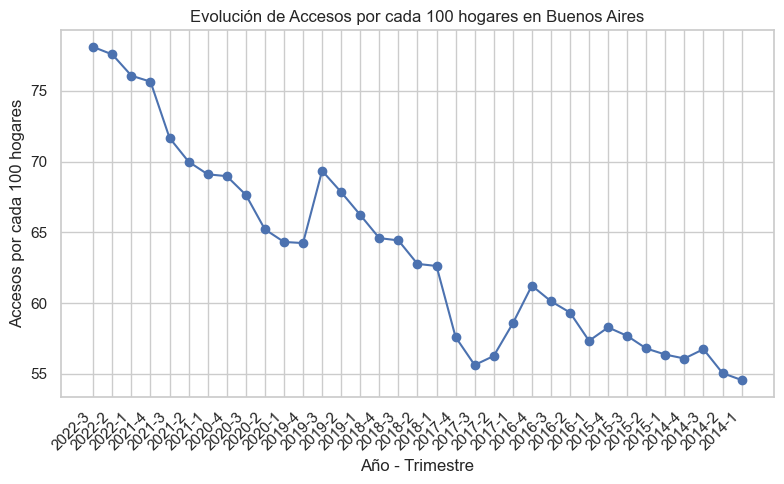

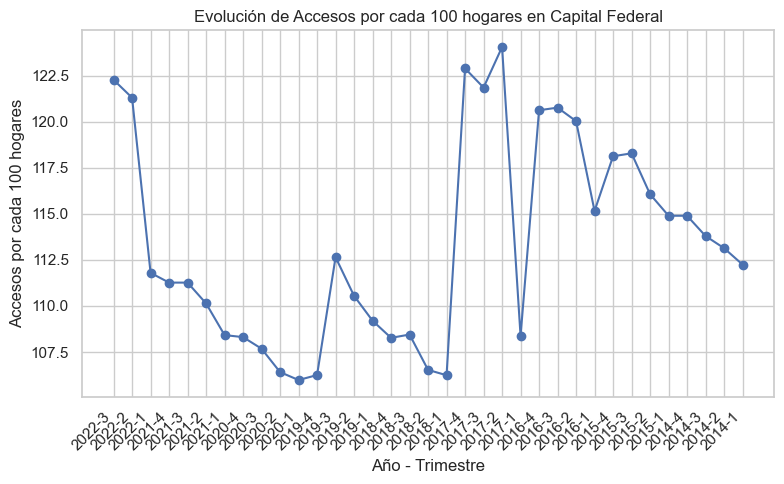

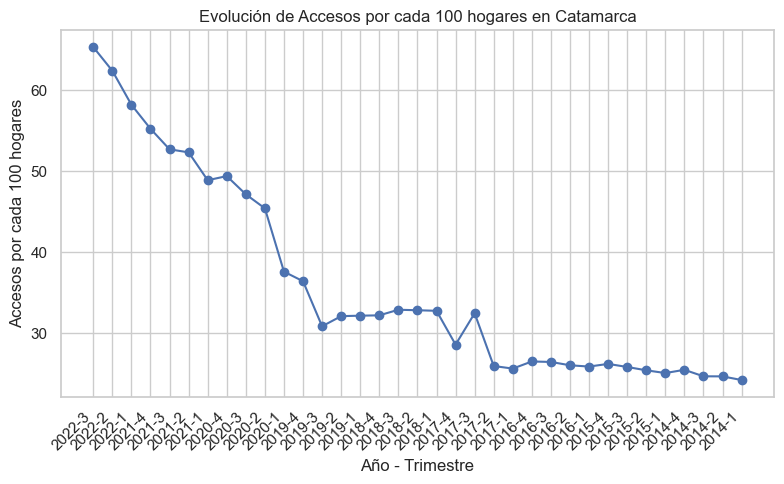

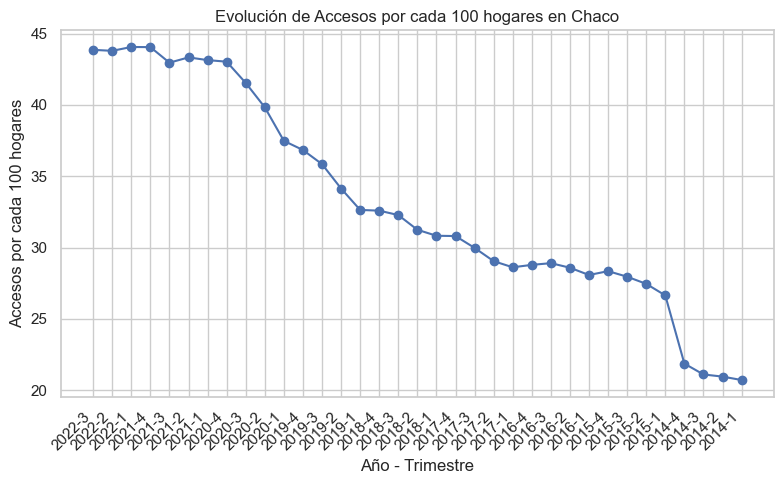

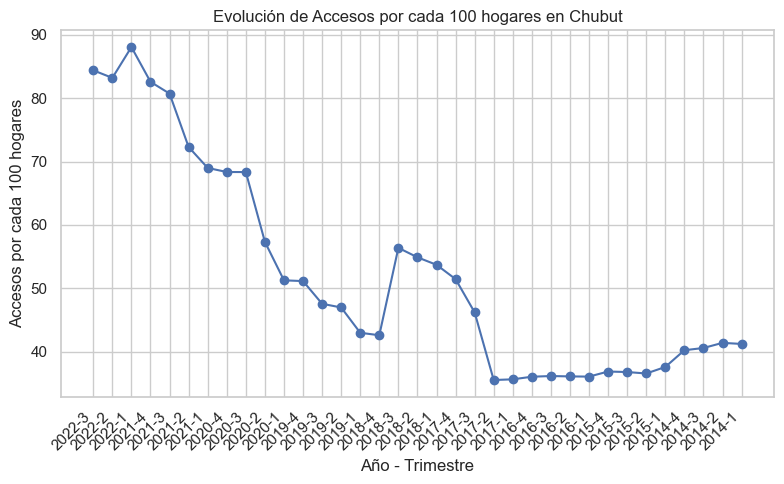

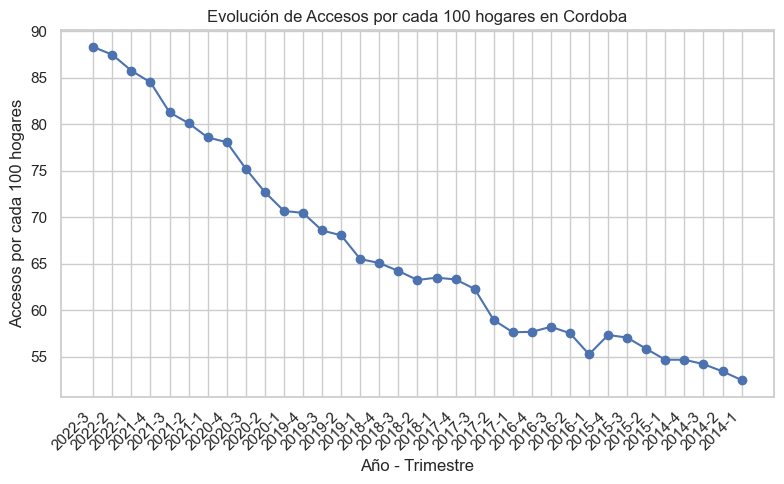

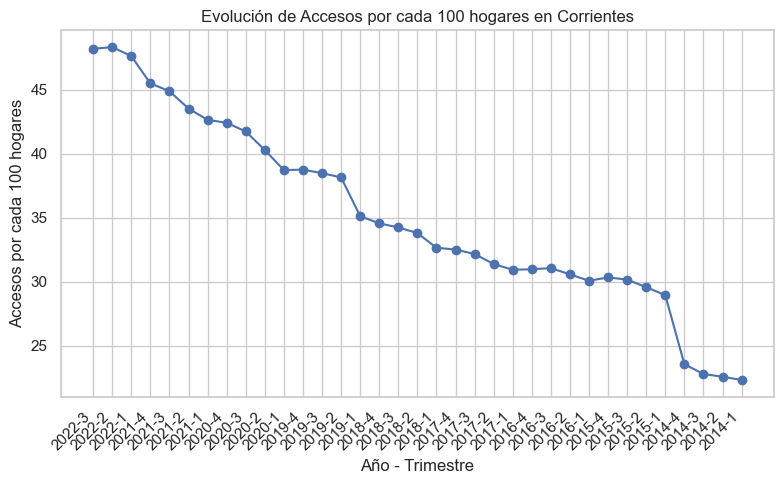

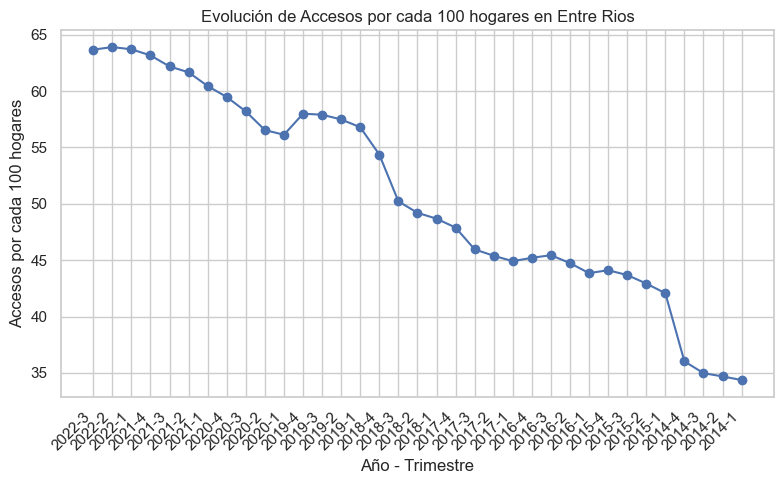

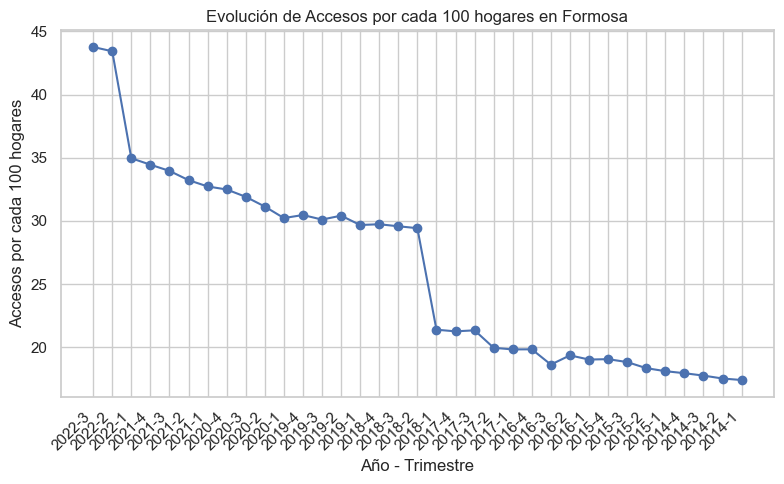

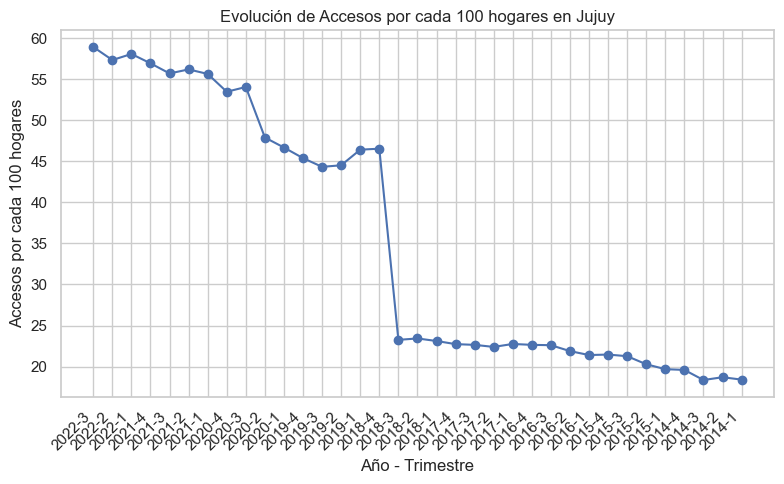

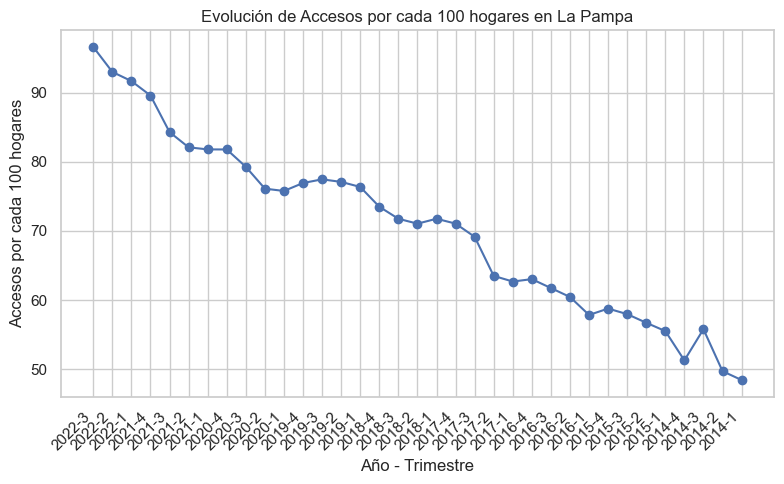

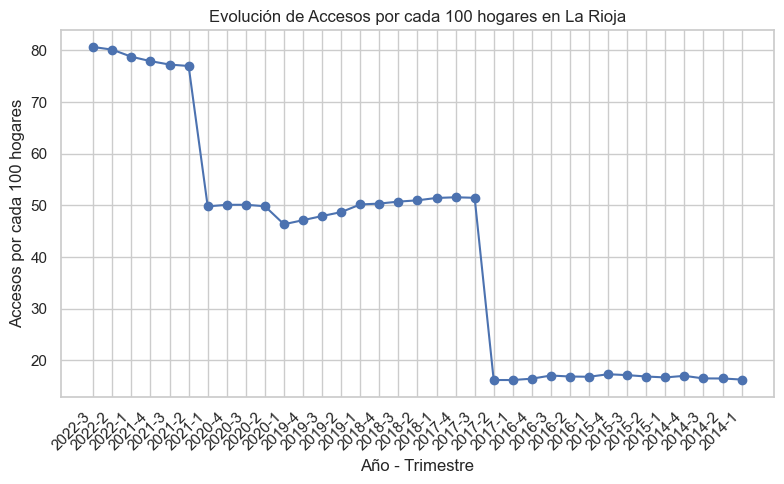

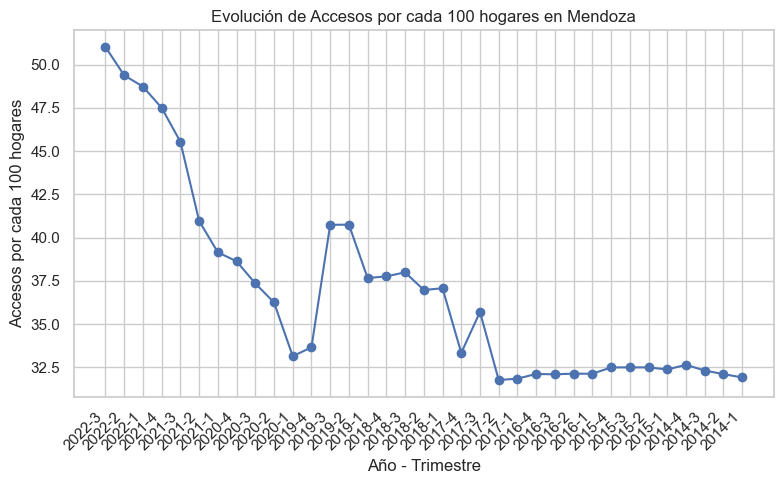

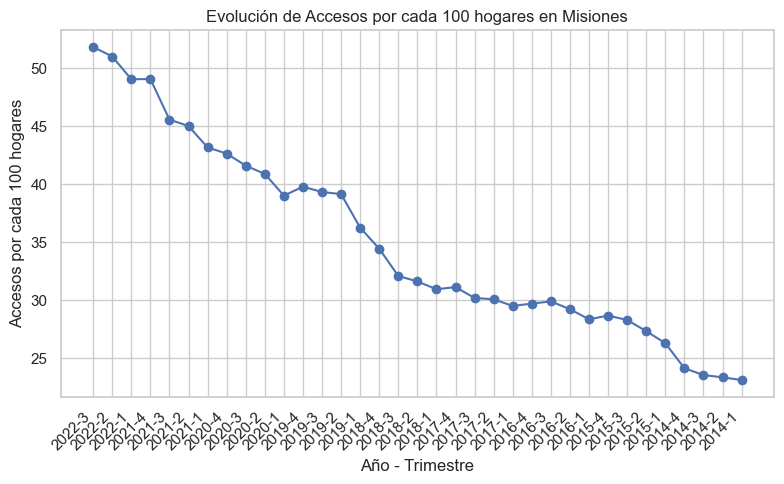

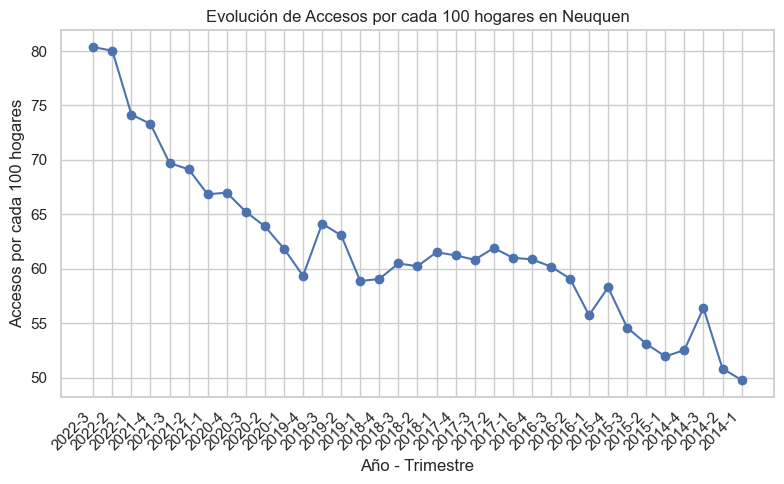

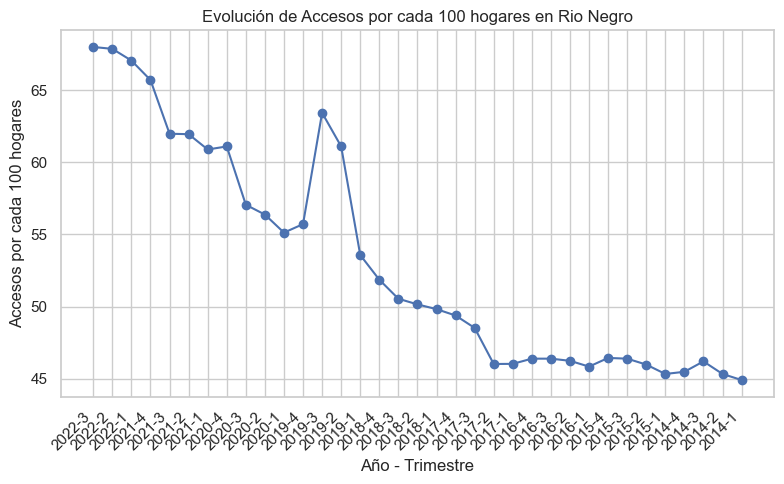

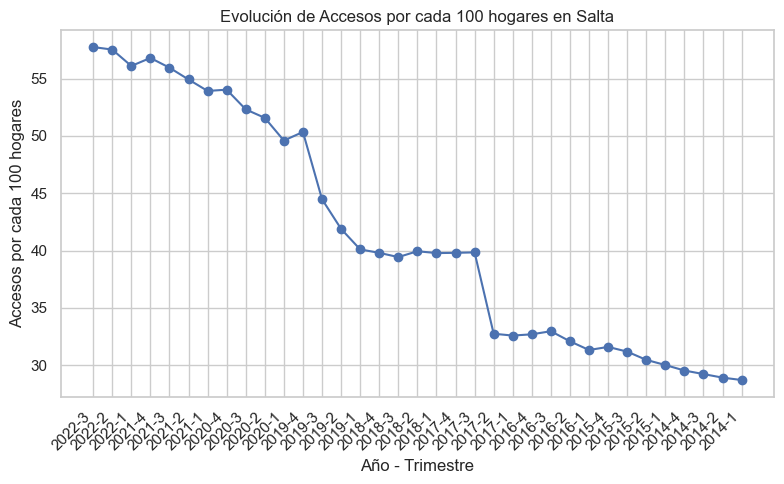

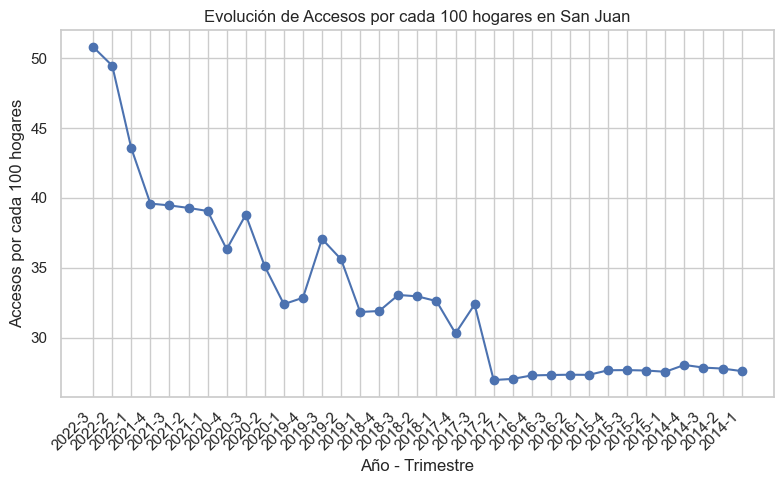

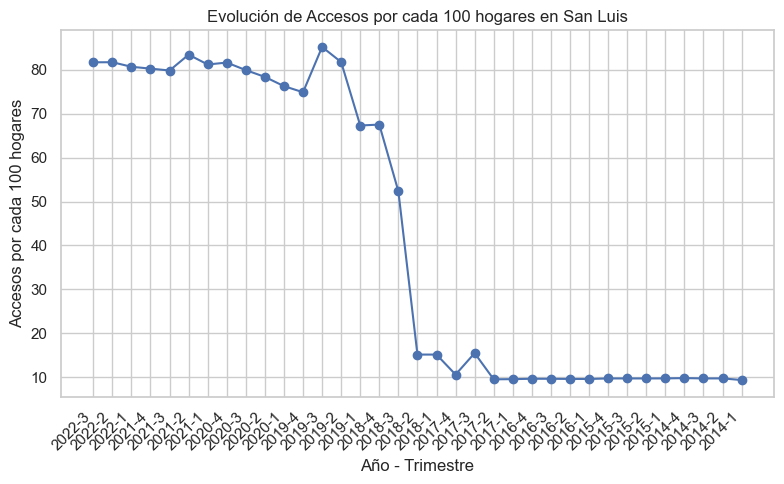

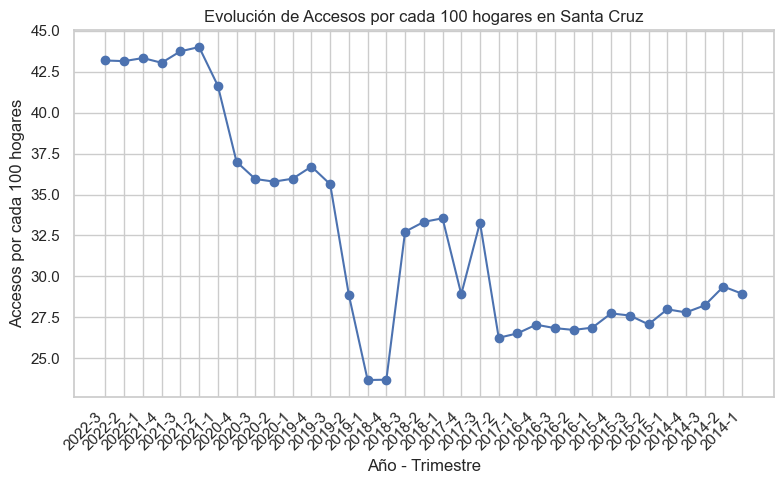

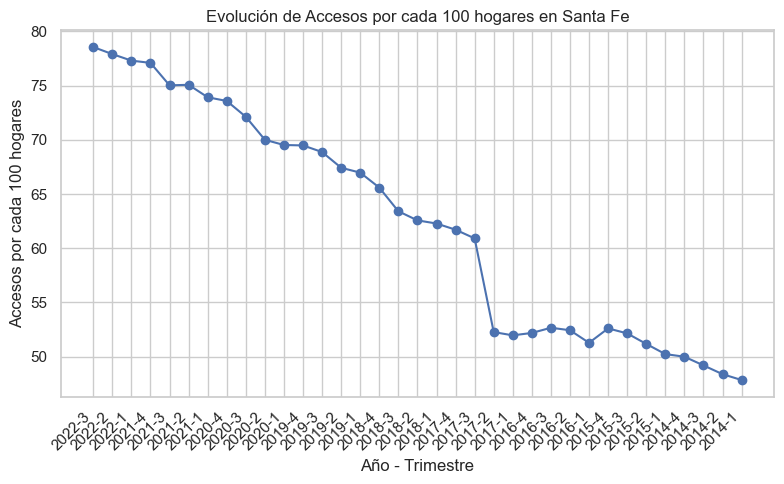

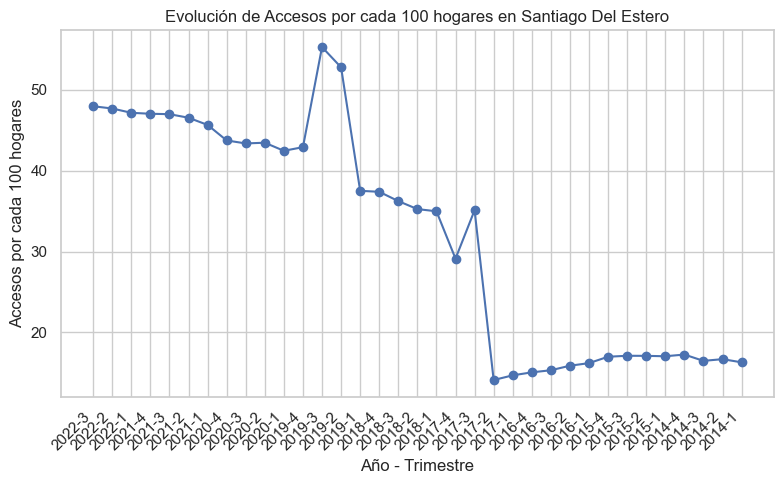

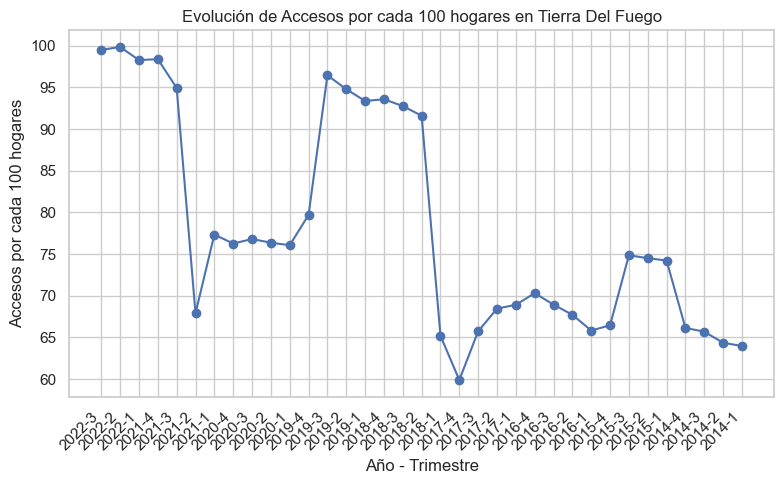

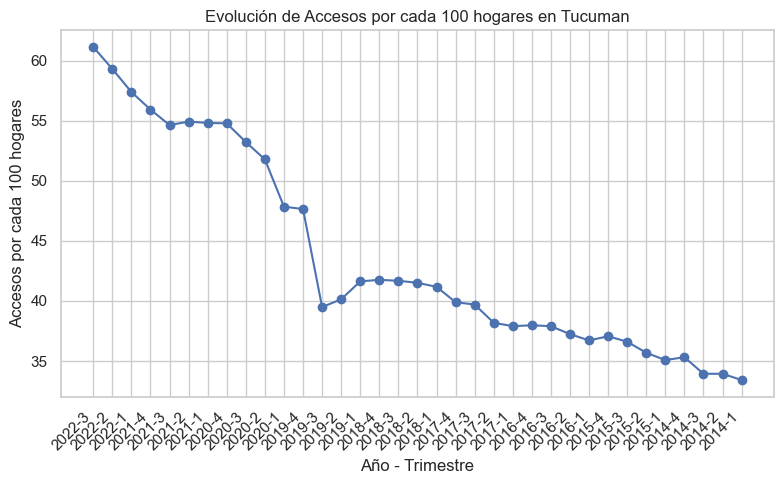

In [323]:
provincias = df_penetracion['Provincia'].unique()

# Crear gráficos individuales por provincia
for provincia in provincias:
    df_provincia = df_penetracion[df_penetracion['Provincia'] == provincia]
    plt.figure(figsize=(8, 5))
    plt.plot(df_provincia['Year_Trim'], df_provincia['Accesos por cada 100 hogares'], marker='o')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Evolución de Accesos por cada 100 hogares en {provincia}')
    plt.xlabel('Año - Trimestre')
    plt.ylabel('Accesos por cada 100 hogares')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Podemos ver claramente hay una fuerte tendencia de crecimiento de los accesos en todas las provincias a lo largo del tiempo

Tendencias generales: Observar si hay una tendencia general de aumento o disminución en los "Accesos por cada 100 hogares" a lo largo del tiempo en todas o la mayoría de las provincias. Esto podría indicar un aumento o mejora en la infraestructura de Internet a nivel nacional.

Estacionalidad: Buscar patrones estacionales o ciclos regulares en los datos, como picos o valles recurrentes en ciertos trimestres o años. Esto podría estar relacionado con factores estacionales o eventos específicos que afectan el acceso a Internet.

Diferencias entre provincias: Comparar las gráficas de las diferentes provincias para identificar si algunas provincias tienen un mayor crecimiento en los accesos a Internet en comparación con otras. Podrías identificar provincias con un crecimiento más rápido o con desaceleraciones en el acceso a Internet.

Eventos significativos: Buscar cambios bruscos o eventos significativos en las gráficas, como picos o caídas repentinas, que puedan estar relacionados con eventos específicos, como cambios en la infraestructura de Internet, políticas gubernamentales o eventos económicos.

Periodos de estabilidad o cambios drásticos: Identificar periodos de estabilidad en los accesos a Internet o c

C:\Users\pablo\AppData\Local\Temp\ipykernel_12532\670964752.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year_Trim', y='Accesos por cada 100 hogares', hue='Provincia', data=df_penetracion, ci=None, alpha=0.5)


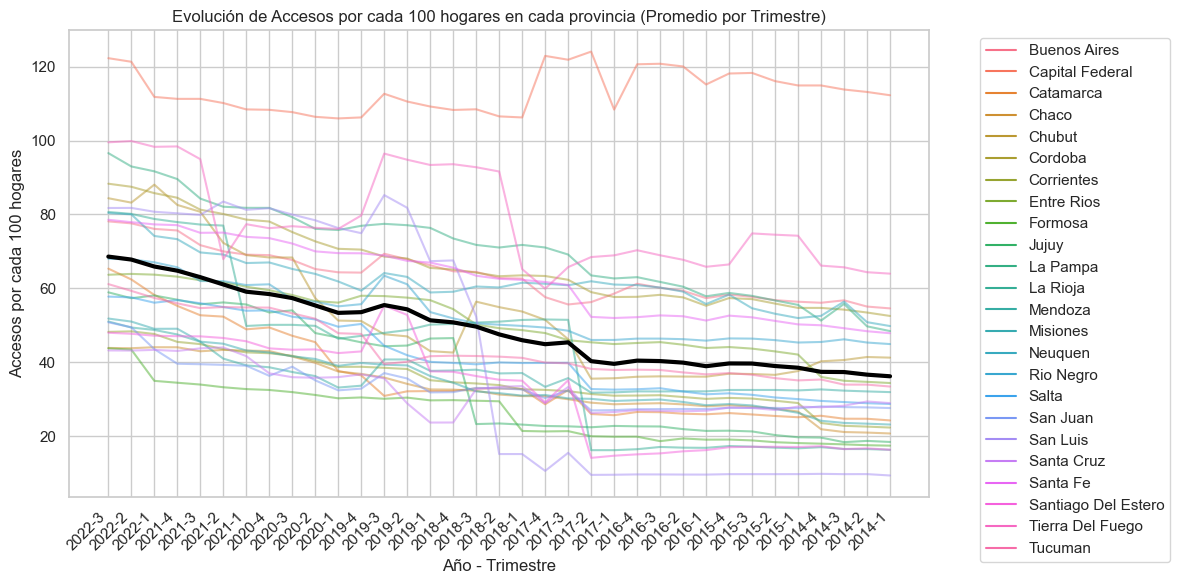

In [324]:
df_promedio = df_penetracion.groupby('Year_Trim')['Accesos por cada 100 hogares'].mean().reset_index()

# Crear el gráfico de área apilado con seaborn
plt.figure(figsize=(12, 6))
sns.set_palette("tab20")  # Utilizar una paleta de colores para distinguir las provincias
sns.lineplot(x='Year_Trim', y='Accesos por cada 100 hogares', hue='Provincia', data=df_penetracion, ci=None, alpha=0.5)
sns.lineplot(x='Year_Trim', y='Accesos por cada 100 hogares', data=df_promedio, color='black', linewidth=3)
plt.xticks(rotation=45, ha='right')
plt.title('Evolución de Accesos por cada 100 hogares en cada provincia (Promedio por Trimestre)')
plt.xlabel('Año - Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

Podemos ver que hay una gran subida los segundos trimestres del año, que es cuando comienza la actividad escolar, y que crece con menor pendiente el ultimo trimestre, que es cuando tienen vacaciones. Sin embargo todos los años el nro de conexiones es mayor que el año anterior.


    Año  Trimestre        Provincia  Accesos por cada 100 hogares Year_Trim
0  2022          3     Buenos Aires                         78.11    2022-3
1  2022          3  Capital Federal                        122.28    2022-3
2  2022          3        Catamarca                         65.33    2022-3
3  2022          3            Chaco                         43.86    2022-3
4  2022          3           Chubut                         84.38    2022-3
          Año  Trimestre  Accesos por cada 100 hogares
count  840.00     840.00                        840.00
mean  2017.89       2.46                         49.07
std      2.53       1.11                         23.15
min   2014.00       1.00                          9.35
25%   2016.00       1.00                         32.11
50%   2018.00       2.00                         45.90
75%   2020.00       3.00                         61.87
max   2022.00       4.00                        124.06


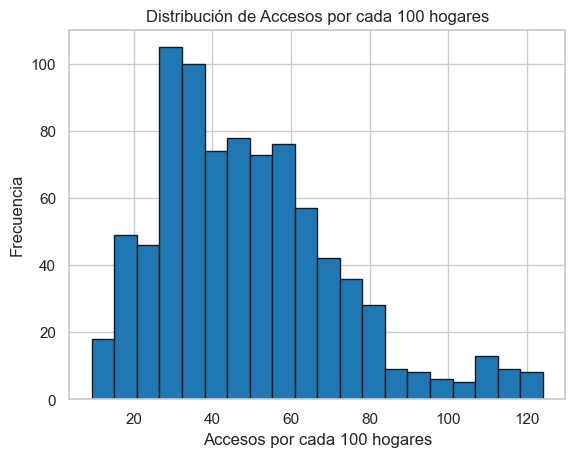

In [325]:

# Visualizar algunas filas del DataFrame
print(df_penetracion.head())

# Obtener estadísticas descriptivas del DataFrame
print(df_penetracion.describe())

# Visualizar la distribución de los accesos por cada 100 hogares
plt.hist(df_penetracion['Accesos por cada 100 hogares'], bins=20, edgecolor='k')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.title('Distribución de Accesos por cada 100 hogares')
plt.show()


Estadísticas descriptivas: Las estadísticas proporcionadas indican que tenemos 840 registros en el dataset. La columna "Año" tiene un rango desde 2014 hasta 2022, y "Trimestre" va de 1 a 4. La columna "Accesos por cada 100 hogares" muestra una media de aproximadamente 49.07, con una desviación estándar de aproximadamente 23.15. El valor mínimo es de 9.35, mientras que el valor máximo es de 124.06.

Accesos por cada 100 hogares: Los valores muestran la cantidad de accesos por cada 100 hogares en diferentes provincias y trimestres. Los accesos oscilan entre 9.35 y 124.06, lo que indica que hay una variabilidad en los niveles de accesos en distintas áreas.

Temporalidad: El dataset contiene datos desde el año 2014 hasta 2022, lo que sugiere que se están recopilando datos durante varios años.

Distribución: La media de los accesos por cada 100 hogares es de aproximadamente 49.07, mientras que la mediana (valor en el percentil 50%) es de aproximadamente 45.90. Esto puede indicar que la distribución de los datos podría estar ligeramente sesgada a la derecha, ya que la media es un poco mayor que la mediana.

Variabilidad: La desviación estándar es de aproximadamente 23.15, lo que indica que los datos están dispersos en relación con la media. La diferencia entre el valor mínimo y el valor máximo es amplia, lo que resalta la variabilidad de los accesos en diferentes áreas y trimestres.










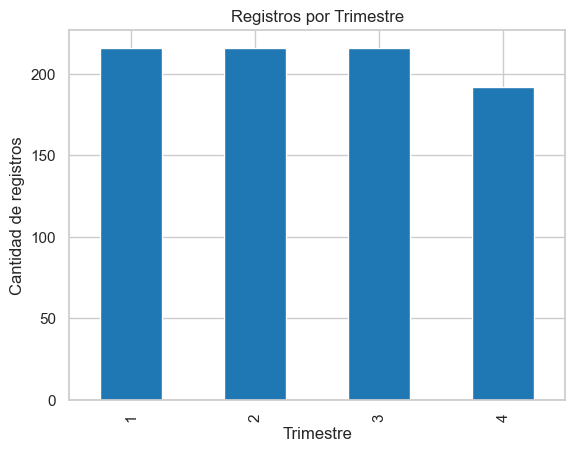

In [326]:
# Gráfico de barras para la cantidad de registros en cada trimestre
df_penetracion['Trimestre'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad de registros')
plt.title('Registros por Trimestre')
plt.show()

In [327]:
# Análisis de correlación entre Año y Accesos por cada 100 hogares
correlation = df_penetracion['Año'].corr(df_penetracion['Accesos por cada 100 hogares'])
print(f"Correlación entre Año y Accesos por cada 100 hogares: {correlation}")

Correlación entre Año y Accesos por cada 100 hogares: 0.42161707575226093


Por el ligero sesgo a la derecha de la distribucion y la correlacion entre año y accesos de 0.42 concluimos que hay una clara tendencia de crecimiento de accesos a traves del tiempo

Ahora analizamos el dataset Internet_BAF

In [328]:
df_baf = pd.read_csv("C:/Users/pablo/OneDrive/Escritorio/henry/Labs Data Analyst/csv_normalizados/Internet_BAF.csv")

In [329]:
df_baf.head(15)

Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total  \
0   2022          3     Buenos Aires           4715469  6199.00  4721668   
1   2022          3  Capital Federal           1545534  2145.00  1547679   
2   2022          3        Catamarca             70292     1.00    70293   
3   2022          3            Chaco            144141     5.00   144146   
4   2022          3           Chubut            164874   904.00   165778   
5   2022          3          Cordoba           1038600    68.00  1038668   
6   2022          3       Corrientes            144842     4.00   144846   
7   2022          3       Entre Rios            268937    22.00   268959   
8   2022          3          Formosa             68537     1.00    68538   
9   2022          3            Jujuy            118823     0.00   118823   
10  2022          3         La Pampa            115921   171.00   116092   
11  2022          3         La Rioja             86860     4.00    86864   
12  2022          3          Mendoza            288746   777.00   289523   
13  2022          3         Misiones            182157     0.00   182157   
14  2022          3          Neuquen            162693   468.00   163161   

   Year_Trim  
0     2022-3  
1     2022-3  
2     2022-3  
3     2022-3  
4     2022-3  
5     2022-3  
6     2022-3  
7     2022-3  
8     2022-3  
9     2022-3  
10    2022-3  
11    2022-3  
12    2022-3  
13    2022-3  
14    2022-3

In [330]:
pd.DataFrame(df_baf.describe())

Año  Trimestre  Banda ancha fija  Dial up      Total
count  840.00     840.00            840.00   838.00     840.00
mean  2017.89       2.46         344767.38   976.63  345741.69
std      2.53       1.11         740050.30  2420.74  741943.58
min   2014.00       1.00          12193.00     0.00   12557.00
25%   2016.00       1.00          51922.25     9.00   52029.75
50%   2018.00       2.00         102936.00   148.00  103489.50
75%   2020.00       3.00         177868.50   619.00  177914.75
max   2022.00       4.00        4715469.00 15229.00 4721668.00

Banda ancha fija: Esta columna muestra la cantidad de conexiones de banda ancha fija. El valor mínimo es de aproximadamente 12,193 conexiones, mientras que el valor máximo es de alrededor de 4,715,469 conexiones. La mediana es de aproximadamente 102,936 conexiones. Esto sugiere una variación significativa en el número de conexiones de banda ancha fija en las provincias.

Dial up: Esta columna parece representar el número de conexiones Dial-up. El valor mínimo es 0 (posiblemente indicando que no hay conexiones Dial-up en algunas filas) y el valor máximo es de aproximadamente 15,229 conexiones. La mediana es de 148 conexiones.

Total: Esta columna indica el total de conexiones, que es la suma de las conexiones de banda ancha fija y Dial-up. Los valores mínimo y máximo son la suma de los valores correspondientes en las columnas anteriores. La mediana es la suma de las medianas de las dos columnas anteriores.

Algunas observaciones adicionales:

Parece haber algunas filas con valores faltantes en las columnas "Dial up". Esto se refleja en el conteo ligeramente inferior en comparación con las otras columnas.

La columna "Año_Trim" no se incluye en df.describe() porque es una columna de texto y no numérica. Esta columna parece combinar la información de año y trimestre en un formato legible.

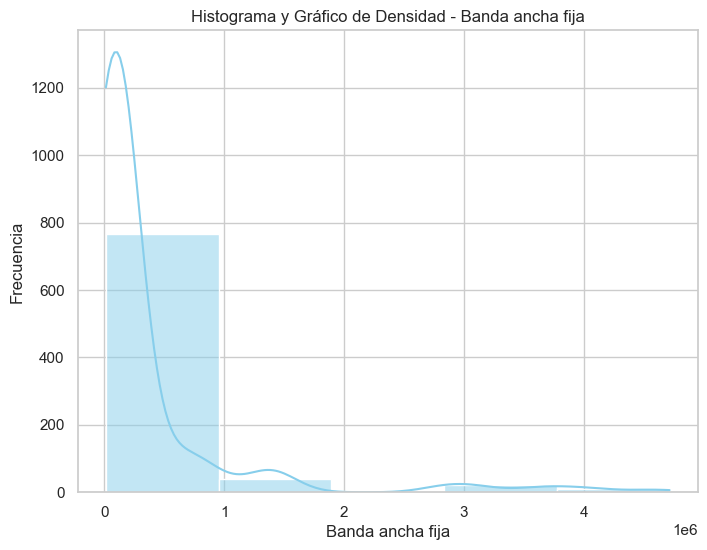

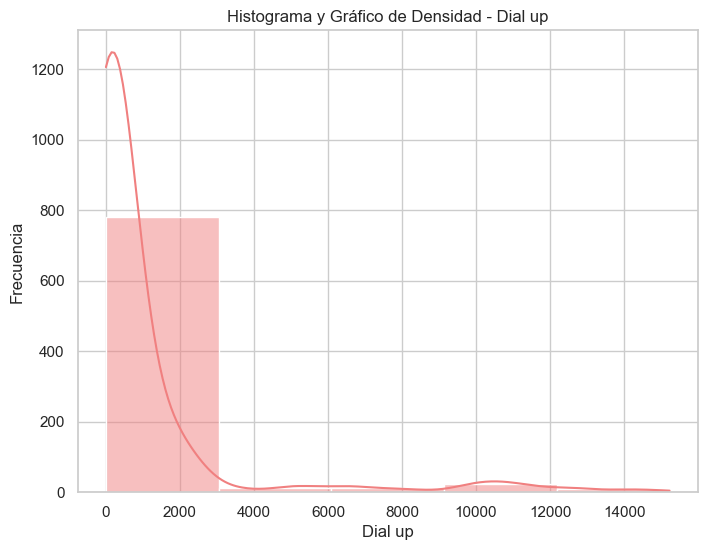

In [331]:
# Histograma y Gráfico de Densidad para "Banda ancha fija"
plt.figure(figsize=(8, 6))
sns.histplot(data=df_baf, x='Banda ancha fija', bins=5, kde=True, color='skyblue')
plt.title('Histograma y Gráfico de Densidad - Banda ancha fija')
plt.xlabel('Banda ancha fija')
plt.ylabel('Frecuencia')
plt.show()

# Histograma y Gráfico de Densidad para "Dial up"
plt.figure(figsize=(8, 6))
sns.histplot(data=df_baf, x='Dial up', bins=5, kde=True, color='lightcoral')
plt.title('Histograma y Gráfico de Densidad - Dial up')
plt.xlabel('Dial up')
plt.ylabel('Frecuencia')
plt.show()


c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


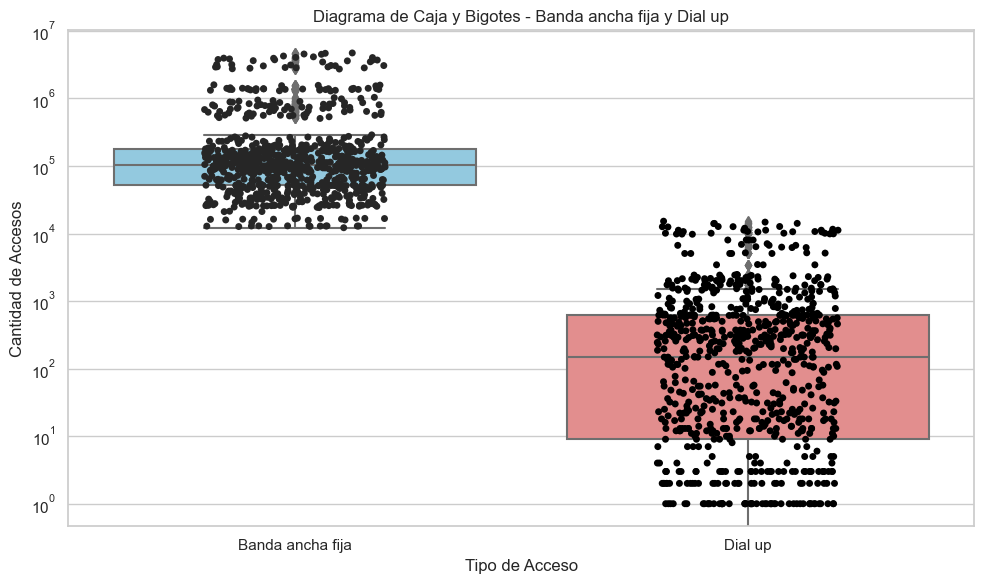

In [332]:
# Crear un nuevo DataFrame solo con las columnas relevantes para el gráfico
df_boxplot = df_baf[['Banda ancha fija', 'Dial up']]

# Crear el gráfico de caja y bigotes usando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_boxplot, palette=['skyblue', 'lightcoral'])
sns.stripplot(data=df_boxplot, color='black', jitter=0.2, size=5)

# Etiquetas y título
plt.xlabel('Tipo de Acceso')
plt.ylabel('Cantidad de Accesos')
plt.yscale('log')  # Ajustar la escala logarítmica en el eje y
plt.title('Diagrama de Caja y Bigotes - Banda ancha fija y Dial up')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


 los outliers superiores (valores extremadamente altos) en esta métrica podrían representar áreas o regiones donde la adopción de Internet es excepcionalmente alta en comparación con el promedio o con otras áreas. Esto podría deberse a varias razones legítimas, como:

Infraestructura avanzada: Puede haber áreas urbanas o regiones que cuentan con una infraestructura de telecomunicaciones más avanzada y eficiente, lo que facilita un mayor acceso a Internet para la mayoría de los hogares.

Demanda específica: Algunas áreas pueden tener una alta demanda de servicios de Internet debido a la presencia de empresas tecnológicas, instituciones educativas o industrias que dependen en gran medida de la conectividad a Internet.

Iniciativas gubernamentales o empresariales: En algunos casos, las políticas gubernamentales o iniciativas empresariales pueden impulsar la adopción de Internet en áreas específicas, proporcionando incentivos o infraestructura adicional.

Condiciones socioeconómicas: Las áreas con altos ingresos pueden tener una mayor adopción de Internet, ya que los hogares pueden permitirse los servicios de banda ancha.

Factores geográficos: La ubicación geográfica también puede desempeñar un papel en la disponibilidad y adopción de Internet. Las áreas remotas pueden tener menos acceso en comparación con las áreas urbanas.

En resumen, los outliers superiores en la métrica de cantidad de accesos a Internet por cada 100 hogares podrían indicar áreas donde la conectividad a Internet es particularmente fuerte y puede ser el resultado de factores como una infraestructura sólida, alta demanda, políticas o inversiones específicas en tecnología. Estos valores extremadamente altos pueden ser de interés para identificar áreas de éxito en términos de adopción de Internet y pueden ser útiles para fines de planificación y toma de decisiones en política pública, inversión en infraestructura o estrategia empresarial.


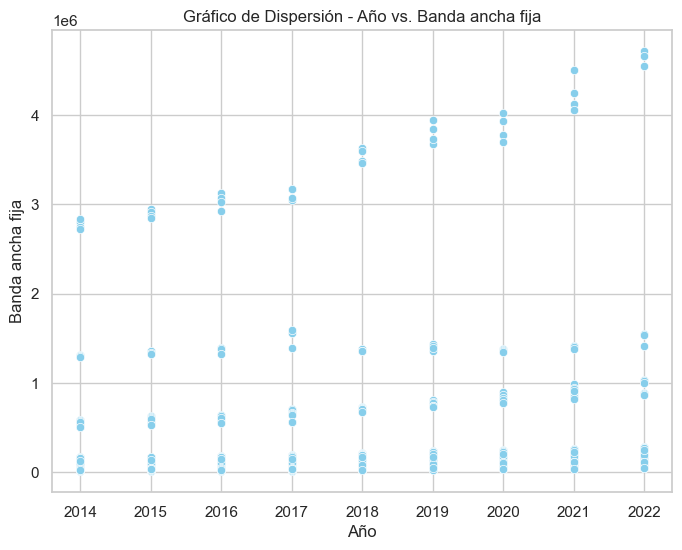

In [333]:
# Gráfico de Dispersión para "Año" y "Banda ancha fija"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_baf, x='Año', y='Banda ancha fija', color='skyblue')
plt.title('Gráfico de Dispersión - Año vs. Banda ancha fija')
plt.xlabel('Año')
plt.ylabel('Banda ancha fija')
plt.show()


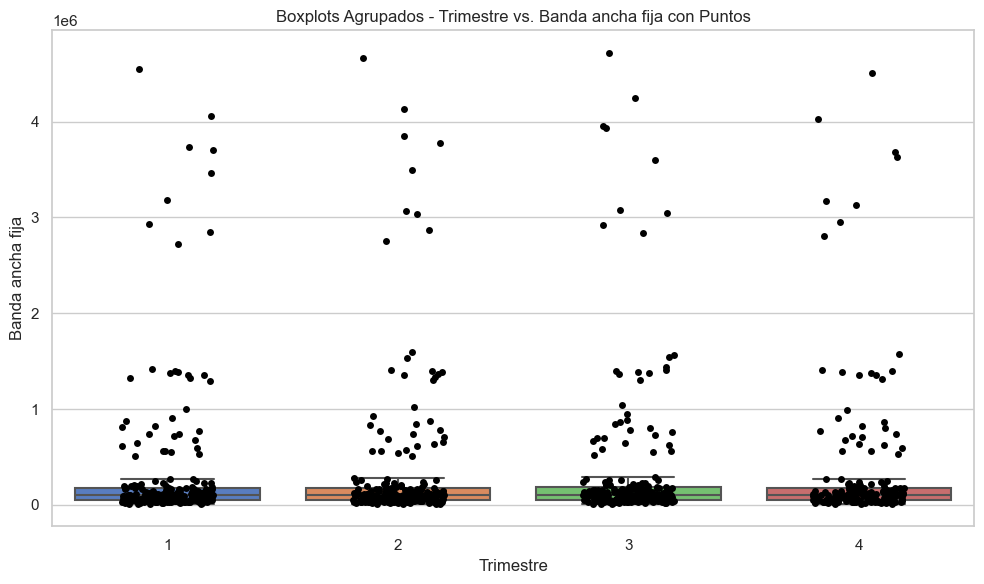

In [334]:
# Crear un gráfico de caja y bigotes con puntos superpuestos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_baf, x='Trimestre', y='Banda ancha fija', palette='muted', showfliers=False)
sns.stripplot(data=df_baf, x='Trimestre', y='Banda ancha fija', color='black', jitter=0.2, size=5)

# Etiquetas y título
plt.title('Boxplots Agrupados - Trimestre vs. Banda ancha fija con Puntos')
plt.xlabel('Trimestre')
plt.ylabel('Banda ancha fija')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [335]:
pd.DataFrame(df_baf.isna().sum())

0
Año               0
Trimestre         0
Provincia         0
Banda ancha fija  0
Dial up           2
Total             0
Year_Trim         0

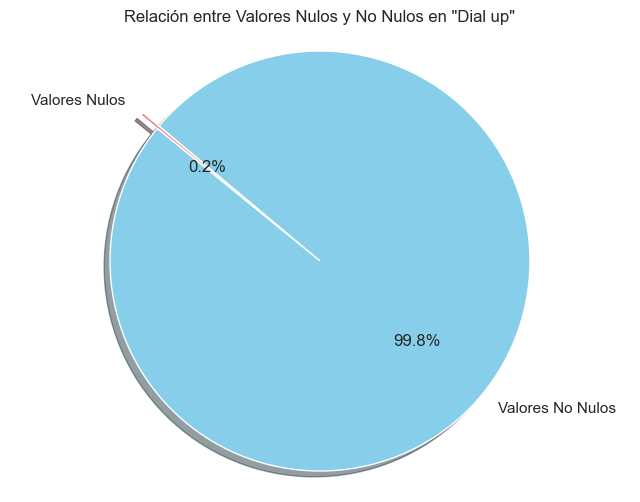

In [336]:
import matplotlib.pyplot as plt

# Contar los valores nulos y no nulos en la columna "Dial up"
valores_nulos = df_baf['Dial up'].isnull().sum()
valores_no_nulos = df_baf['Dial up'].count()

# Crear un gráfico de pastel para representar la relación
labels = ['Valores Nulos', 'Valores No Nulos']
sizes = [valores_nulos, valores_no_nulos]
colors = ['lightcoral', 'skyblue']
explode = (0.1, 0)  # Explode el segmento de "Valores Nulos" para resaltarlo

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Relación entre Valores Nulos y No Nulos en "Dial up"')
plt.axis('equal')  # Asegura que el gráfico sea un círculo

plt.show()



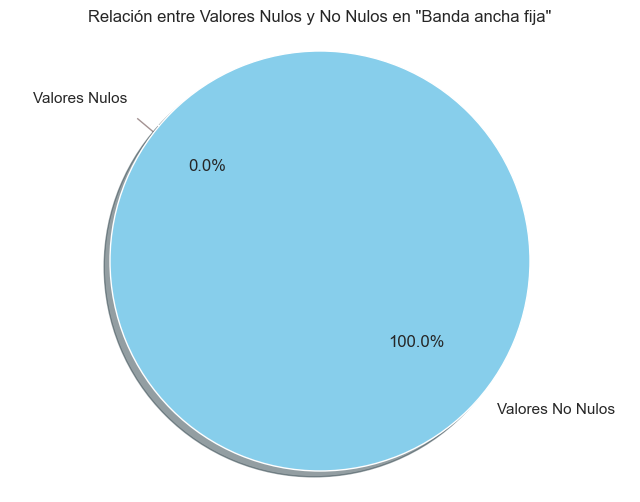

In [337]:


# Contar los valores nulos y no nulos en la columna "Dial up"
valores_nulos = df_baf['Banda ancha fija'].isnull().sum()
valores_no_nulos = df_baf['Banda ancha fija'].count()

# Crear un gráfico de pastel para representar la relación
labels = ['Valores Nulos', 'Valores No Nulos']
sizes = [valores_nulos, valores_no_nulos]
colors = ['lightcoral', 'skyblue']
explode = (0.1, 0)  # Explode el segmento de "Valores Nulos" para resaltarlo

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Relación entre Valores Nulos y No Nulos en "Banda ancha fija"')
plt.axis('equal')  # Asegura que el gráfico sea un círculo

plt.show()


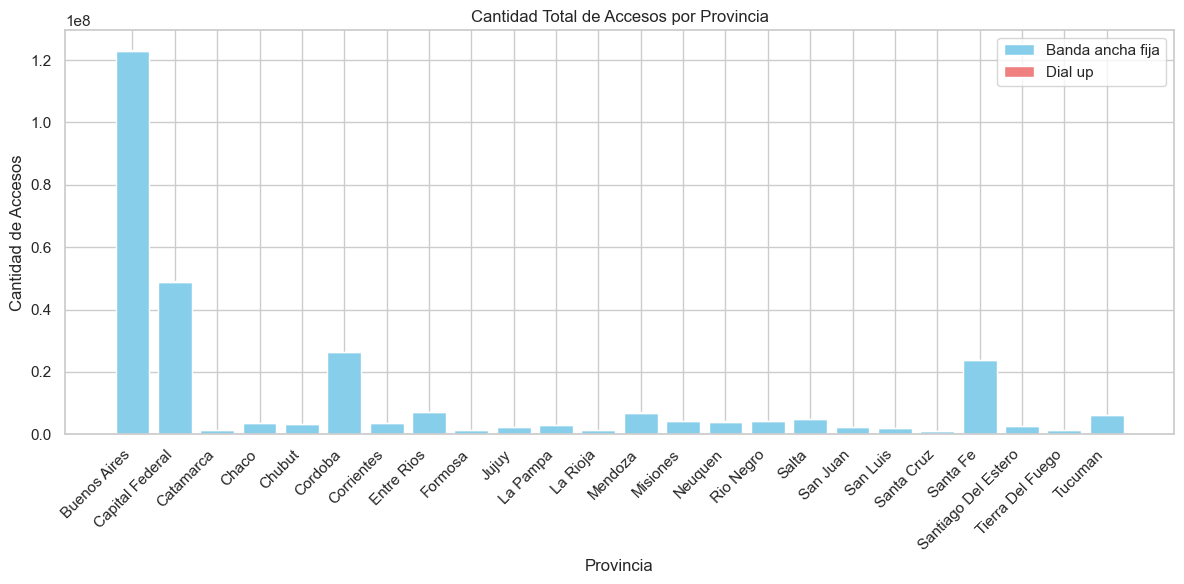

In [338]:


# Agrupar los datos por provincia y sumar los accesos de banda ancha fija y dial-up
accesos_por_provincia = df_baf.groupby('Provincia')[['Banda ancha fija', 'Dial up']].sum()

# Obtener el nombre de las provincias y las cantidades de accesos
provincias = accesos_por_provincia.index
accesos_banda_ancha = accesos_por_provincia['Banda ancha fija']
accesos_dial_up = accesos_por_provincia['Dial up']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar barras para banda ancha fija
ax.bar(provincias, accesos_banda_ancha, label='Banda ancha fija', color='skyblue')

# Graficar barras para dial-up sobre las barras de banda ancha fija
ax.bar(provincias, accesos_dial_up, bottom=accesos_banda_ancha, label='Dial up', color='lightcoral')

# Etiquetas y título
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad de Accesos')
ax.set_title('Cantidad Total de Accesos por Provincia')
ax.legend()

# Rotar etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


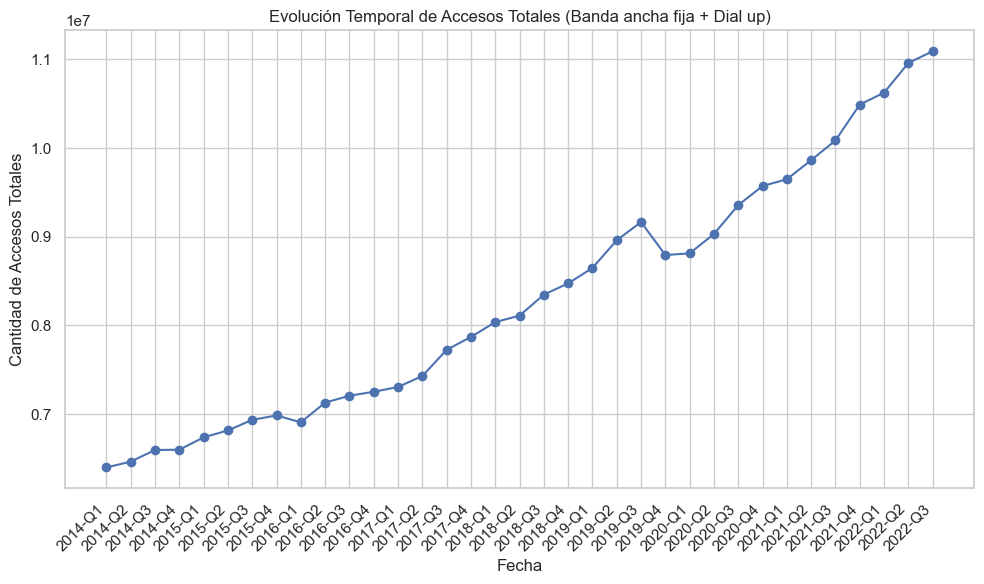

In [339]:

# Crear una nueva columna "Fecha" a partir de las columnas "Año" y "Trimestre"
df_baf['Fecha'] = df_baf['Año'].astype(str) + '-Q' + df_baf['Trimestre'].astype(str)

# Agrupar los datos por la fecha y sumar los accesos totales
accesos_por_fecha = df_baf.groupby('Fecha')['Total'].sum()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la evolución temporal de los accesos totales (banda ancha fija y dial-up)
ax.plot(accesos_por_fecha.index, accesos_por_fecha.values, marker='o', color='b')

# Etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Accesos Totales')
ax.set_title('Evolución Temporal de Accesos Totales (Banda ancha fija + Dial up)')

# Rotar etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


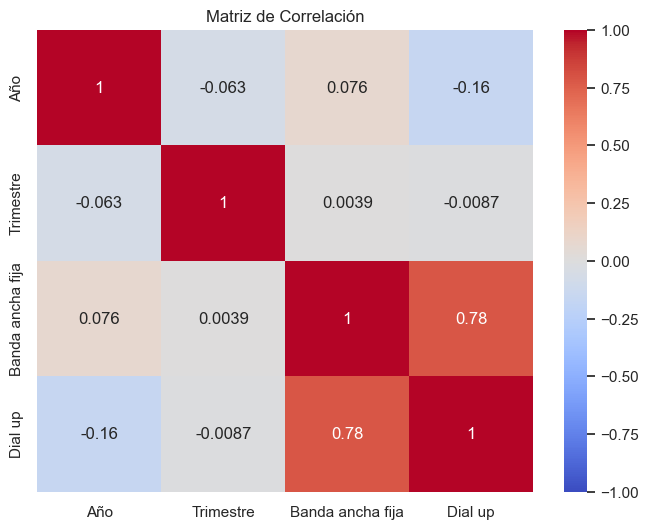

In [340]:
import seaborn as sns

# Crear un nuevo DataFrame solo con las columnas numéricas
df_numeric = df_baf[['Año', 'Trimestre', 'Banda ancha fija', 'Dial up']]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Etiquetas y título
plt.title('Matriz de Correlación')
plt.show()



Podemos apreciar que la conexion por banda ancha y dial up son demandadas casi directamente proporcionales entre si

In [341]:
df_tecnologia = pd.read_csv("C:/Users/pablo/OneDrive/Escritorio/Henry/Labs Data Analyst/csv_normalizados/Accesos-tecnologia-provincia.csv")

In [342]:
df_tecnologia

Año Trimestre            Provincia    ADSL  Cablemodem  Fibra óptica  \
0    2022         3         Buenos Aires  339648     2748325       1436433   
1    2022         3      Capital Federal  140791     1240125        129218   
2    2022         3            Catamarca   10010       10495         46224   
3    2022         3                Chaco   27164       61800         44645   
4    2022         3               Chubut   45377       72212          9574   
..    ...       ...                  ...     ...         ...           ...   
835  2014         1           Santa Cruz   18927         100           381   
836  2014         1             Santa Fe  322662      174296          3059   
837  2014         1  Santiago Del Estero   32567        3598            19   
838  2014         1     Tierra Del Fuego   21618        2837           648   
839  2014         1              Tucuman  129717          83           121   

     Wireless  Otros    Total Year_Trim  
0      126846  70416  4721668    2022-3  
1        5758  31787  1547679    2022-3  
2        1329   2235    70293    2022-3  
3        8178   2359   144146    2022-3  
4       29784   8831   165778    2022-3  
..        ...    ...      ...       ...  
835      4092   3264    26764    2014-1  
836      5951   6440   506612    2014-1  
837      9150    340    37133    2014-1  
838        10   2934    28038    2014-1  
839       130    980   130032    2014-1  

[840 rows x 10 columns]

In [343]:
# Configurar opciones de formato de punto flotante
pd.options.display.float_format = '{:.2f}'.format


In [344]:
df_tecnologia.Year_Trim.replace({'2019 *-3 *': '2019-3',
                       '2019 *-2 *': '2019-2',
                       '2019 *-1 *': '2019-1'}, inplace=True)

In [345]:
df_tecnologia.describe()

ADSL  Cablemodem  Fibra óptica  Wireless    Otros      Total
count     840.00      840.00        840.00    840.00   840.00     840.00
mean   127566.81   171775.05      29911.86   9937.42  6603.88  345741.69
std    255054.30   422166.10     123501.26  17564.22 10132.97  741943.58
min      6842.00        0.00          0.00      0.00    13.00   12557.00
25%     22479.25     8599.75        186.00   1158.50   772.50   52029.75
50%     48596.00    34984.00       1093.00   4262.00  2734.50  103489.50
75%    104569.50    70748.50      13862.50  11333.50  7546.50  177914.75
max   1586343.00  2748325.00    1436433.00 126887.00 73415.00 4721668.00

ADSL:

Conteo (count): Hay 840 observaciones válidas para la tecnología ADSL.

Media (mean): La cantidad promedio de accesos ADSL por provincia es de aproximadamente 127,567.

Desviación Estándar (std): La dispersión de los datos es alta, con una desviación estándar de aproximadamente 255,054. Esto indica que los valores varían significativamente.

Valor Mínimo (min): El valor mínimo registrado para ADSL es 6,842.

Percentiles (25%, 50%, 75%): El 25% de las provincias tienen menos de 22,479 accesos ADSL, mientras que el 75% tienen menos de 104,570.

Valor Máximo (max): El valor máximo registrado para ADSL es 1,586,343.

Cablemodem:

Conteo (count): Hay 840 observaciones válidas para la tecnología Cablemodem.

Media (mean): La cantidad promedio de accesos Cablemodem por provincia es de aproximadamente 171,775.

Desviación Estándar (std): La dispersión de los datos es alta, con una desviación estándar de aproximadamente 422,166.

Valor Mínimo (min): El valor mínimo registrado para Cablemodem es 0, lo que podría indicar áreas sin uso de Cablemodem.

Percentiles (25%, 50%, 75%): El 25% de las provincias tienen menos de 8,600 accesos Cablemodem, mientras que el 75% tienen menos de 70,749.

Valor Máximo (max): El valor máximo registrado para Cablemodem es 2,748,325.

Fibra óptica:

Conteo (count): Hay 840 observaciones válidas para la tecnología de Fibra óptica.

Media (mean): La cantidad promedio de accesos de Fibra óptica por provincia es de aproximadamente 29,912.

Desviación Estándar (std): La dispersión de los datos es alta, con una desviación estándar de aproximadamente 123,501.

Valor Mínimo (min): El valor mínimo registrado para Fibra óptica es 0.

Percentiles (25%, 50%, 75%): El 25% de las provincias tienen menos de 186 accesos de Fibra óptica, mientras que el 75% tienen menos de 13,863.

Valor Máximo (max): El valor máximo registrado para Fibra óptica es 1,436,433.

Wireless:

Conteo (count): Hay 840 observaciones válidas para la tecnología Wireless.

Media (mean): La cantidad promedio de accesos Wireless por provincia es de aproximadamente 9,937.

Desviación Estándar (std): La dispersión de los datos es moderada, con una desviación estándar de aproximadamente 17,564.

Valor Mínimo (min): El valor mínimo registrado para Wireless es 0.

Percentiles (25%, 50%, 75%): El 25% de las provincias tienen menos de 1,159 accesos Wireless, mientras que el 75% tienen menos de 11,334.

Valor Máximo (max): El valor máximo registrado para Wireless es 126,887.

Otros:

Conteo (count): Hay 840 observaciones válidas para la categoría "Otros".

Media (mean): La cantidad promedio de accesos en la categoría "Otros" por provincia es de aproximadamente 6,604.

Desviación Estándar (std): La dispersión de los datos es moderada, con una desviación estándar de aproximadamente 10,133.

Valor Mínimo (min): El valor mínimo registrado en la categoría "Otros" es 13.

Percentiles (25%, 50%, 75%): El 25% de las provincias tienen menos de 773 accesos en la categoría "Otros", mientras que el 75% tienen menos de 7,547.

Valor Máximo (max): El valor máximo registrado en la categoría "Otros" es 73,415.

Total:


Conteo (count): Hay 840 observaciones válidas para el total de accesos.

Media (mean): La cantidad promedio total de accesos por provincia es de aproximadamente 345,742.

Desviación Estándar (std): La dispersión de los datos es alta, con una desviación estándar de aproximadamente 741,944.

Valor Mínimo (min): El valor mínimo registrado para el total de accesos es 12,557.

Percentiles (25%, 50%, 75%): El 25% de las provincias tienen menos de 52,030 accesos totales, mientras que el 75% tienen menos de 177,915.

Valor Máximo (max): El valor máximo registrado para el total de accesos es 4,721,668.

----------------------------------------------------------------------------------------------------------------------------------------

A partir del análisis de las estadísticas descriptivas de tus datos en el DataFrame, se pueden obtener varias conclusiones y observaciones importantes:

Variabilidad en el Acceso a Tecnologías: Existe una gran variabilidad en la cantidad de accesos a diferentes tecnologías de Internet (ADSL, Cablemodem, Fibra óptica, Wireless, Otros) en las provincias. Esto se refleja en las altas desviaciones estándar en todas las categorías, lo que sugiere que la dispersión de los datos es considerable.

Diferencias en el Uso de Tecnologías: Las medias (mean) muestran que la cantidad promedio de accesos varía significativamente entre las tecnologías. Por ejemplo, el promedio de accesos a Cablemodem es mayor que el promedio de accesos a Fibra óptica.

Valores Mínimos: Se observa que en algunas tecnologías, como "Cablemodem," existen provincias donde no se registra ningún acceso ("min" igual a 0). Esto indica que ciertas provincias pueden no utilizar ciertas tecnologías.

Distribución Asimétrica: Las diferencias entre el valor mediano (50%) y la media sugieren que la distribución de los datos podría ser asimétrica. Un valor mediano menor que la media indica una posible asimetría hacia la derecha, mientras que un valor mediano mayor que la media indica una posible asimetría hacia la izquierda.

Acceso Total: El análisis del total de accesos muestra una amplia variabilidad, con un rango que va desde valores mínimos hasta máximos significativamente altos. Esto podría reflejar la combinación de diferentes tecnologías utilizadas en diferentes provincias.

Inexistencia de Valores Nulos: El hecho de que no haya valores nulos o faltantes en el DataFrame es positivo, ya que no es necesario realizar imputaciones de datos faltantes.

Diferencias Regionales: Para obtener una comprensión más completa de estos datos, sería útil realizar análisis adicionales, como la comparación de tendencias de accesos entre diferentes regiones geográficas o a lo largo del tiempo. Esto podría revelar patrones específicos según la ubicación o el período de tiempo.


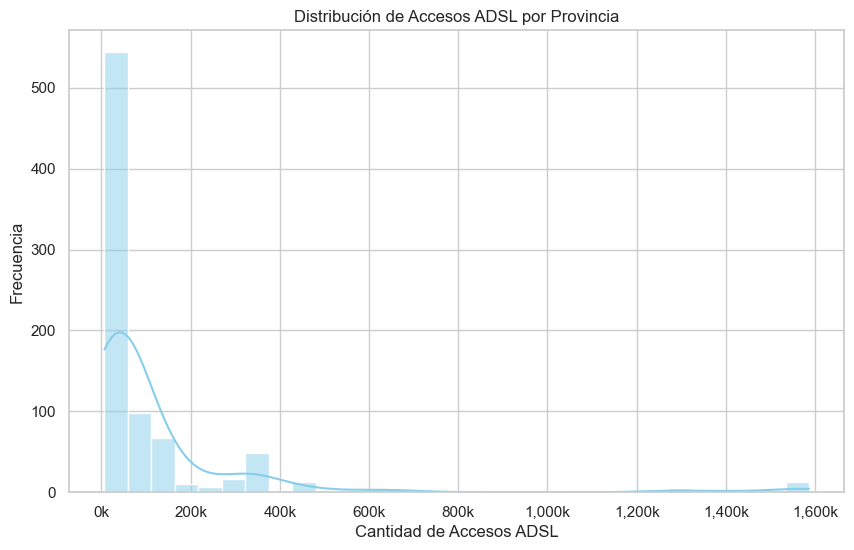

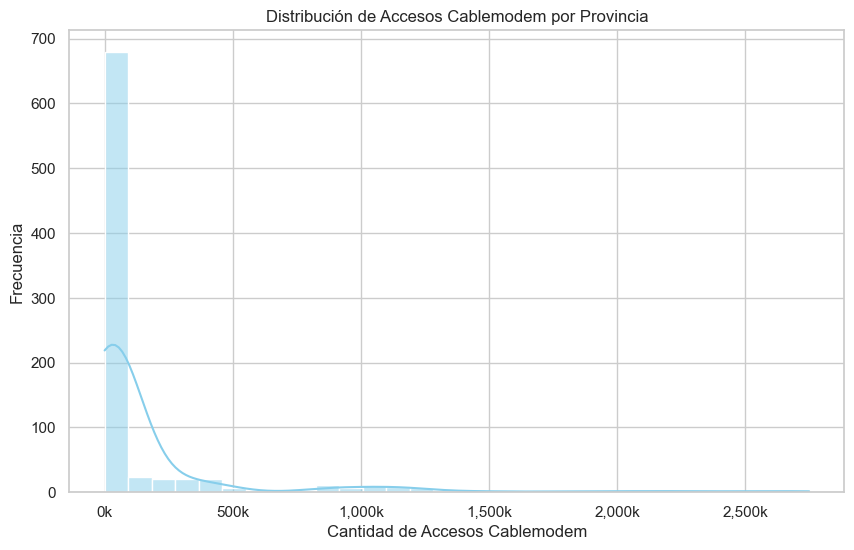

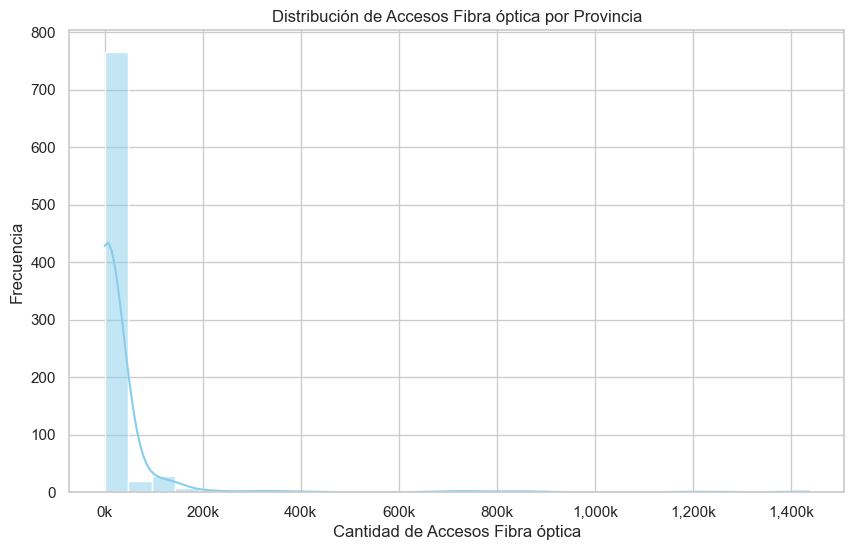

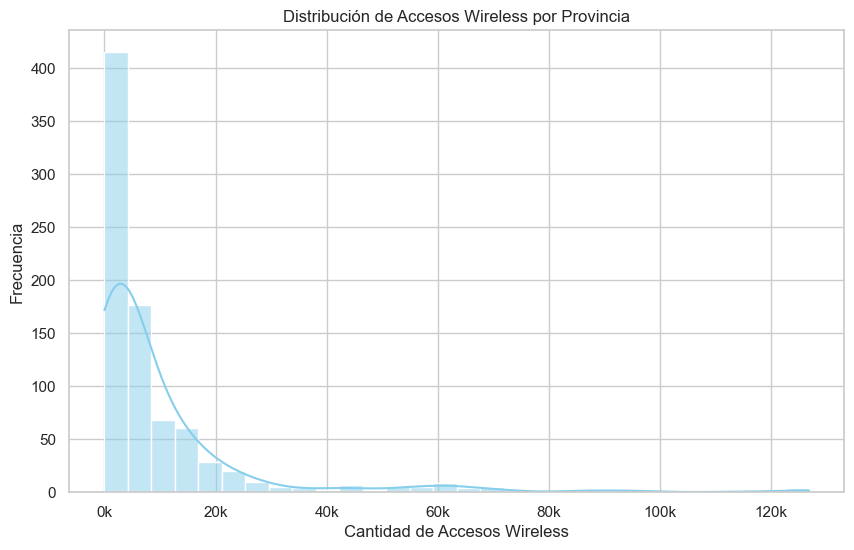

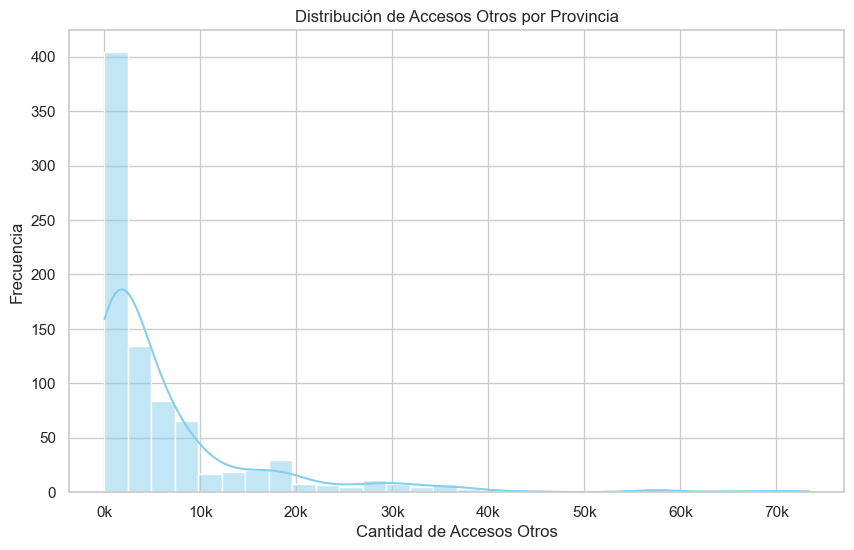

In [346]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Función para formatear las etiquetas de los ejes en miles
def format_thousands(x, _):
    return '{:,.0f}k'.format(x / 1000)

# Histograma para la tecnología ADSL
plt.figure(figsize=(10, 6))
sns.histplot(data=df_tecnologia, x='ADSL', bins=30, kde=True, color='skyblue')
plt.title('Distribución de Accesos ADSL por Provincia')
plt.xlabel('Cantidad de Accesos ADSL')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_thousands))
plt.show()

# Histograma para la tecnología Cablemodem
plt.figure(figsize=(10, 6))
sns.histplot(data=df_tecnologia, x='Cablemodem', bins=30, kde=True, color='skyblue')
plt.title('Distribución de Accesos Cablemodem por Provincia')
plt.xlabel('Cantidad de Accesos Cablemodem')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_thousands))
plt.show()

# Histograma para la tecnología Fibra óptica
plt.figure(figsize=(10, 6))
sns.histplot(data=df_tecnologia, x='Fibra óptica', bins=30, kde=True, color='skyblue')
plt.title('Distribución de Accesos Fibra óptica por Provincia')
plt.xlabel('Cantidad de Accesos Fibra óptica')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_thousands))
plt.show()

# Histograma para la tecnología Wireless
plt.figure(figsize=(10, 6))
sns.histplot(data=df_tecnologia, x='Wireless', bins=30, kde=True, color='skyblue')
plt.title('Distribución de Accesos Wireless por Provincia')
plt.xlabel('Cantidad de Accesos Wireless')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_thousands))
plt.show()

# Histograma para la tecnología Otros
plt.figure(figsize=(10, 6))
sns.histplot(data=df_tecnologia, x='Otros', bins=30, kde=True, color='skyblue')
plt.title('Distribución de Accesos Otros por Provincia')
plt.xlabel('Cantidad de Accesos Otros')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_thousands))
plt.show()

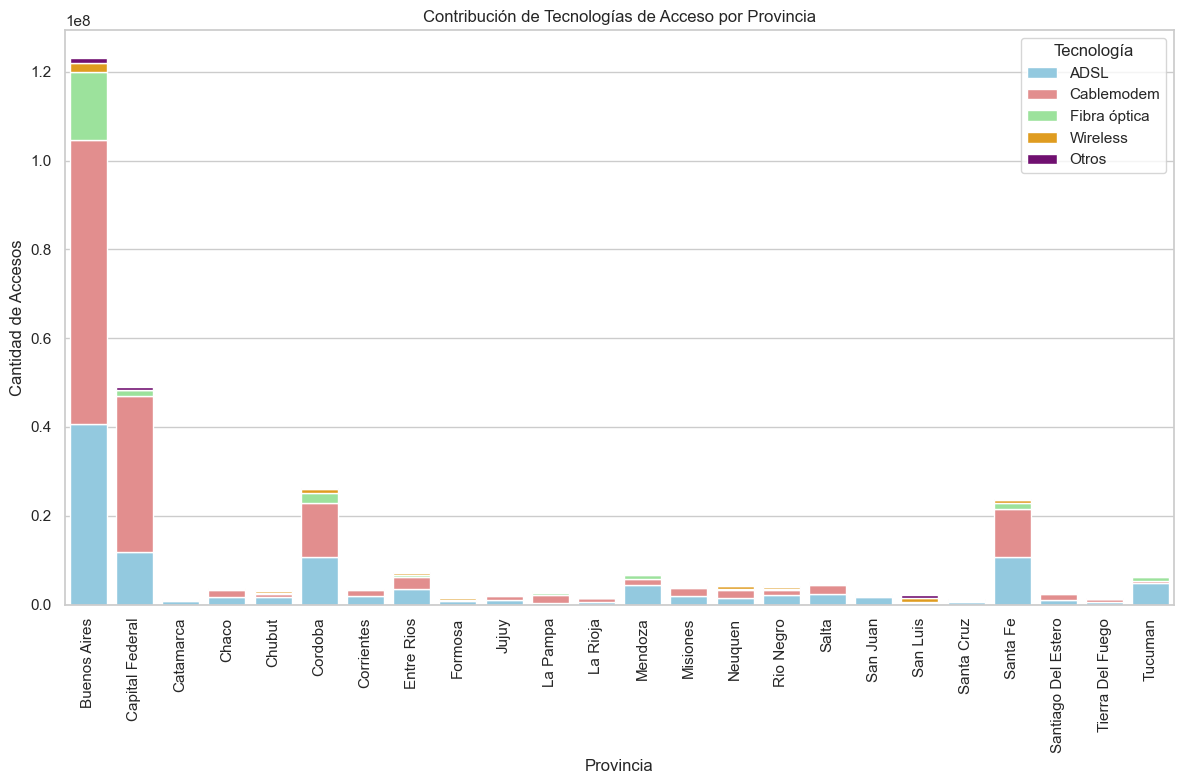

In [347]:
# Agrupar el DataFrame por provincia y sumar las cantidades de accesos para cada tecnología
df_grouped = df_tecnologia.groupby('Provincia').sum().reset_index()

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped, x='Provincia', y='ADSL', label='ADSL', color='skyblue')
sns.barplot(data=df_grouped, x='Provincia', y='Cablemodem', label='Cablemodem', color='lightcoral', bottom=df_grouped['ADSL'])
sns.barplot(data=df_grouped, x='Provincia', y='Fibra óptica', label='Fibra óptica', color='lightgreen', bottom=df_grouped['ADSL'] + df_grouped['Cablemodem'])
sns.barplot(data=df_grouped, x='Provincia', y='Wireless', label='Wireless', color='orange', bottom=df_grouped['ADSL'] + df_grouped['Cablemodem'] + df_grouped['Fibra óptica'])
sns.barplot(data=df_grouped, x='Provincia', y='Otros', label='Otros', color='purple', bottom=df_grouped['ADSL'] + df_grouped['Cablemodem'] + df_grouped['Fibra óptica'] + df_grouped['Wireless'])

# Configurar etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Accesos')
plt.title('Contribución de Tecnologías de Acceso por Provincia')
plt.xticks(rotation=90)
plt.legend(title='Tecnología')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

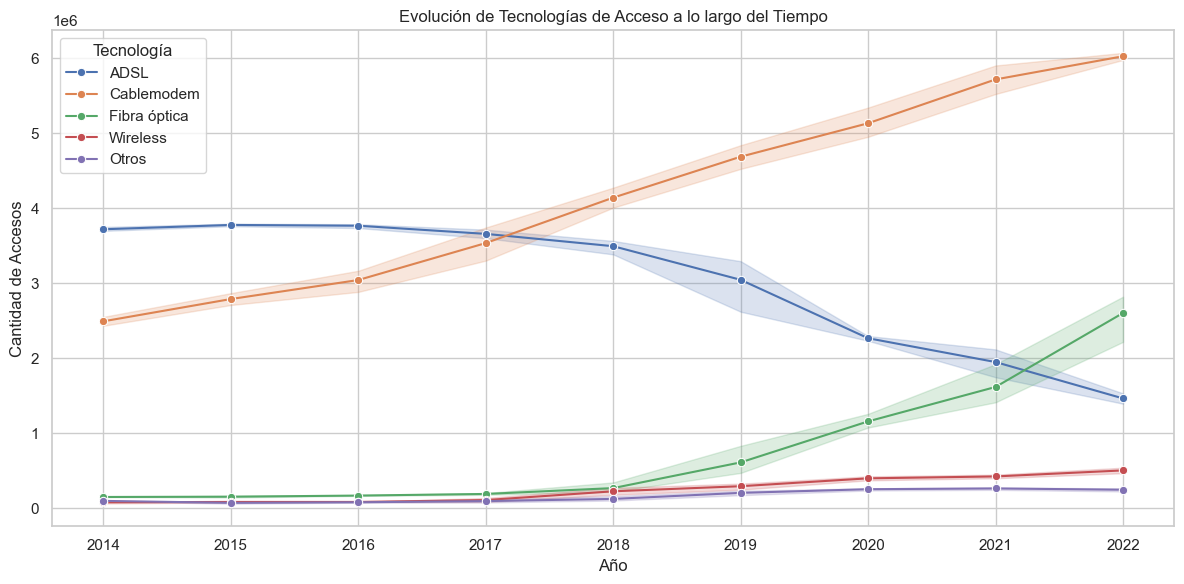

In [393]:
# Agrupar el DataFrame por año y trimestre y sumar las cantidades de accesos para cada tecnología
df_time_series = df_tecnologia.groupby(['Año', 'Trimestre']).sum().reset_index()

df_time_series.Trimestre.replace({'-3 *': '3',
                       '2 *': '2',
                       '1 *': '1'}, inplace=True)
df_time_series['Año'].replace({'2019 *': '2019',
                       '2019 *': '2019',
                       '2019 *': '2019'}, inplace=True)

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de líneas para cada tecnología
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time_series, x='Año', y='ADSL', label='ADSL', marker='o')
sns.lineplot(data=df_time_series, x='Año', y='Cablemodem', label='Cablemodem', marker='o')
sns.lineplot(data=df_time_series, x='Año', y='Fibra óptica', label='Fibra óptica', marker='o')
sns.lineplot(data=df_time_series, x='Año', y='Wireless', label='Wireless', marker='o')
sns.lineplot(data=df_time_series, x='Año', y='Otros', label='Otros', marker='o')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')
plt.title('Evolución de Tecnologías de Acceso a lo largo del Tiempo')
plt.legend(title='Tecnología')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

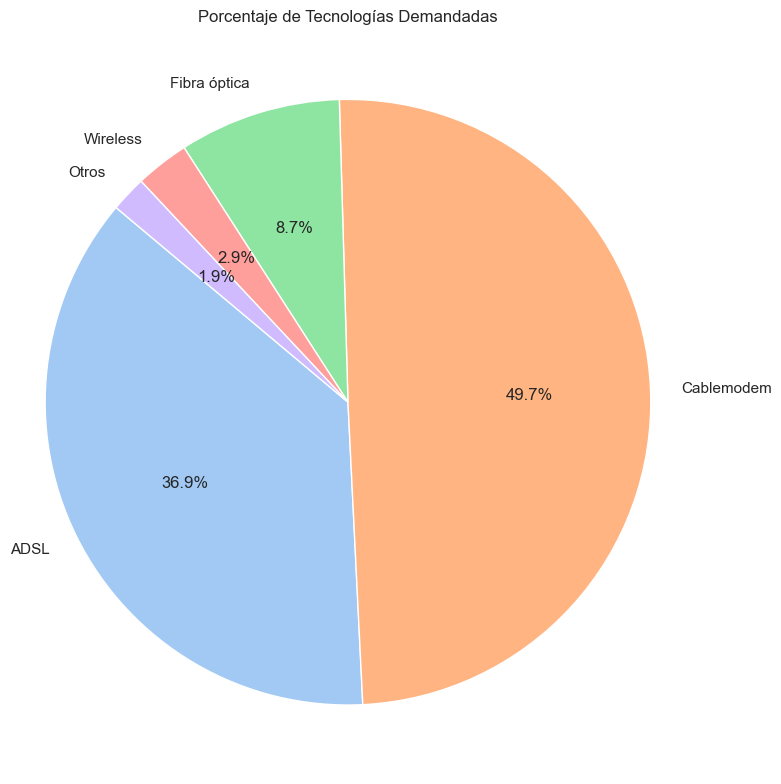

In [349]:
# Agrupar el DataFrame y sumar las cantidades de accesos para cada tecnología
df_total = df_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de tortas
plt.figure(figsize=(8, 8))
plt.pie(df_total, labels=df_total.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Porcentaje de Tecnologías Demandadas')

# Mostrar el gráfico
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.tight_layout()
plt.show()

Podemos analizar en base a los graficos anteriores que Fibra optica es la tecnologia mas demandada y la menos explotada en las provincias.
Cable Modem es la mas usada pero su demanda esta bajando

c:\Users\pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


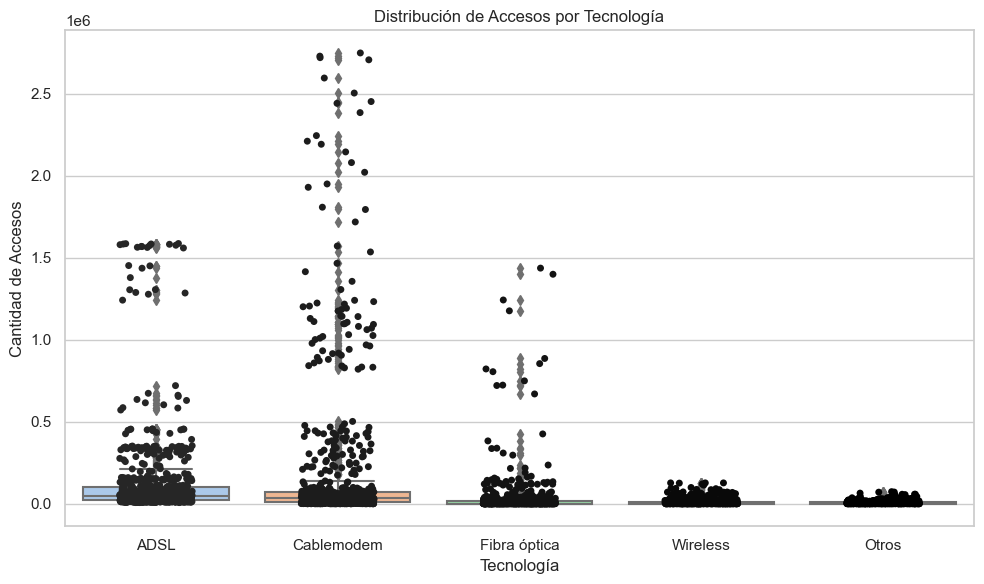

In [350]:
# Seleccionar las columnas relevantes para el gráfico
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Crear el gráfico de caja y bigotes usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tecnologia[tecnologias], palette='pastel')
sns.stripplot(data=df_tecnologia[tecnologias], color='black', jitter=0.2, size=5)

# Configurar etiquetas y título
plt.xlabel('Tecnología')
plt.ylabel('Cantidad de Accesos')
plt.title('Distribución de Accesos por Tecnología')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En este grafico podemos observar que el valor mas comun es 0 por la ausencia de las tecnologias en las provincias, las que tienen outliers maximos son las tecnologias en las que se podria invertir en infraestructura para cubrir esas ausencias

In [351]:
df_velocidad = pd.read_csv("C:/Users/pablo/OneDrive/Escritorio/Henry/Labs Data Analyst/csv_normalizados/Accesos-velocidad-provincia.csv")

In [352]:
df_velocidad.head()

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2022          3     Buenos Aires           29985                27709   
1  2022          3  Capital Federal             517                 5742   
2  2022          3        Catamarca              71                  384   
3  2022          3            Chaco             461                  987   
4  2022          3           Chubut             109                 1444   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0             290315              297915               267044   
1              34371               67829                51946   
2               3107                5389                 5099   
3              16782               18938                 8049   
4              45707                3094                34682   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS    Total  
0                12419    3618689  65821.00  4721668  
1                28692    1253105 105477.00  1547679  
2                 3737      50298   2208.00    70293  
3                15828      79390   3711.00   144146  
4                15309      17563  20024.00   165778

In [353]:
df_velocidad.describe()

Año  Trimestre  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
count  840.00     840.00          840.00               840.00   
mean  2017.89       2.46         1782.01              9548.81   
std      2.53       1.11        10909.41             21846.65   
min   2014.00       1.00            6.00                 0.00   
25%   2016.00       1.00           36.75               285.00   
50%   2018.00       2.00          109.00              2061.00   
75%   2020.00       3.00          467.00              7419.00   
max   2022.00       4.00       199768.00            171244.00   

       + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
count             840.00              840.00               840.00   
mean           150969.97            33476.69             34262.50   
std            348153.84            60913.37             87523.23   
min              2842.00                0.00                 0.00   
25%             28539.25             1899.25              1119.50   
50%             48834.50             7886.00              7120.00   
75%             86897.50            29956.00             24396.50   
max           2299705.00           403575.00            886678.00   

       + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
count               840.00     840.00    834.00     840.00  
mean              18724.29   79179.56   4968.66  343988.81  
std               70508.83  342623.37  12217.73  737336.59  
min                   0.00       0.00  -1945.00   12406.00  
25%                  22.00       7.00      0.00   52328.25  
50%                 807.50     882.50      0.00  104333.00  
75%                8325.00   19660.75   5015.25  177579.75  
max              949093.00 3618689.00 120464.00 4721668.00

El DataFrame contiene información sobre la cantidad de accesos a Internet en diferentes categorías de velocidad (por ejemplo, "HASTA 512 kbps", "+ 512 Kbps - 1 Mbps", etc.) para varias provincias y trimestres.

La columna "Total" parece representar la suma total de todos los tipos de acceso para cada provincia y trimestre.

Algunos valores en la columna "OTROS" están expresados como porcentajes (por ejemplo, "65.82" y "105.48"). Es importante aclarar si estos valores son porcentajes o si representan alguna otra medida.

Hay 840 observaciones válidas en todas las columnas.
Los datos cubren un período desde 2014 hasta 2022.
Las columnas que representan categorías de velocidad varían en términos de rango y desviación estándar.
Algunas columnas tienen valores mínimos negativos, lo que podría indicar algún problema en los datos.

Las columnas de velocidad parecen estar ordenadas en función de la velocidad, desde "HASTA 512 kbps" hasta "OTROS". Esto puede ser útil para realizar análisis de tendencias.
La columna "Total" muestra la cantidad total de accesos a Internet en cada provincia y trimestre, lo que podría ser útil para comparar la demanda general de acceso a Internet en diferentes regiones.

Conclusiones Iniciales:
Se necesita aclaración sobre la naturaleza de los valores en la columna "OTROS" para una interpretación precisa de estos datos.

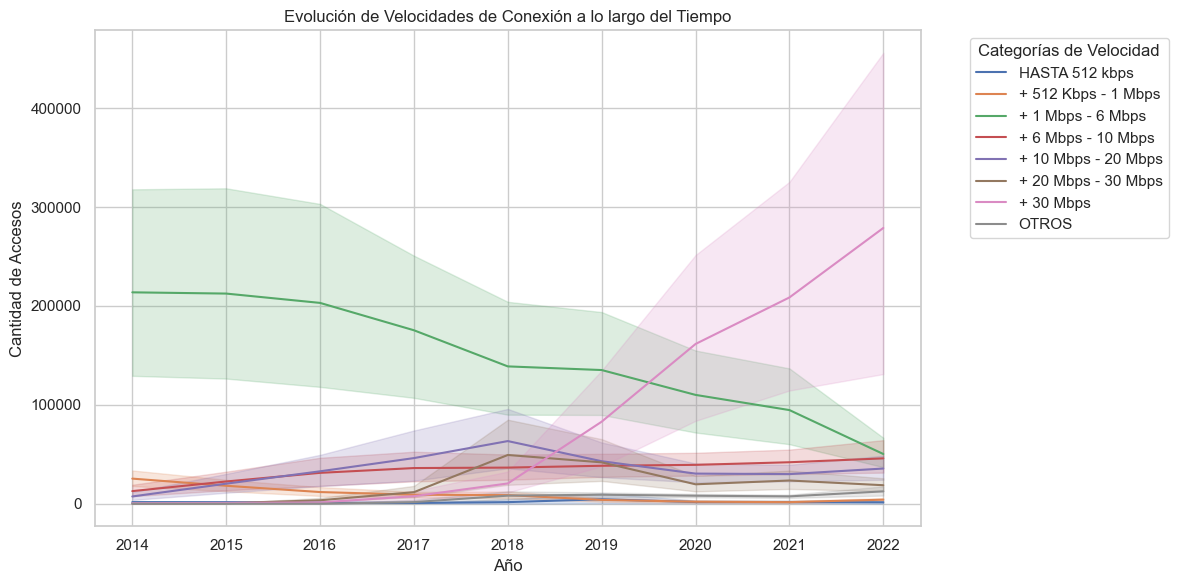

In [354]:
# Seleccionar las columnas relevantes para el gráfico de líneas temporales
columnas_temporales = ['Año', 'Trimestre', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Crear un DataFrame con las columnas seleccionadas
df_temporal = df_velocidad[columnas_temporales]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas temporales
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_temporal, x='Año', y='HASTA 512 kbps', label='HASTA 512 kbps')
sns.lineplot(data=df_temporal, x='Año', y='+ 512 Kbps - 1 Mbps', label='+ 512 Kbps - 1 Mbps')
sns.lineplot(data=df_temporal, x='Año', y='+ 1 Mbps - 6 Mbps', label='+ 1 Mbps - 6 Mbps')
sns.lineplot(data=df_temporal, x='Año', y='+ 6 Mbps - 10 Mbps', label='+ 6 Mbps - 10 Mbps')
sns.lineplot(data=df_temporal, x='Año', y='+ 10 Mbps - 20 Mbps', label='+ 10 Mbps - 20 Mbps')
sns.lineplot(data=df_temporal, x='Año', y='+ 20 Mbps - 30 Mbps', label='+ 20 Mbps - 30 Mbps')
sns.lineplot(data=df_temporal, x='Año', y='+ 30 Mbps', label='+ 30 Mbps')
sns.lineplot(data=df_temporal, x='Año', y='OTROS', label='OTROS')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')
plt.title('Evolución de Velocidades de Conexión a lo largo del Tiempo')
plt.legend(title='Categorías de Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

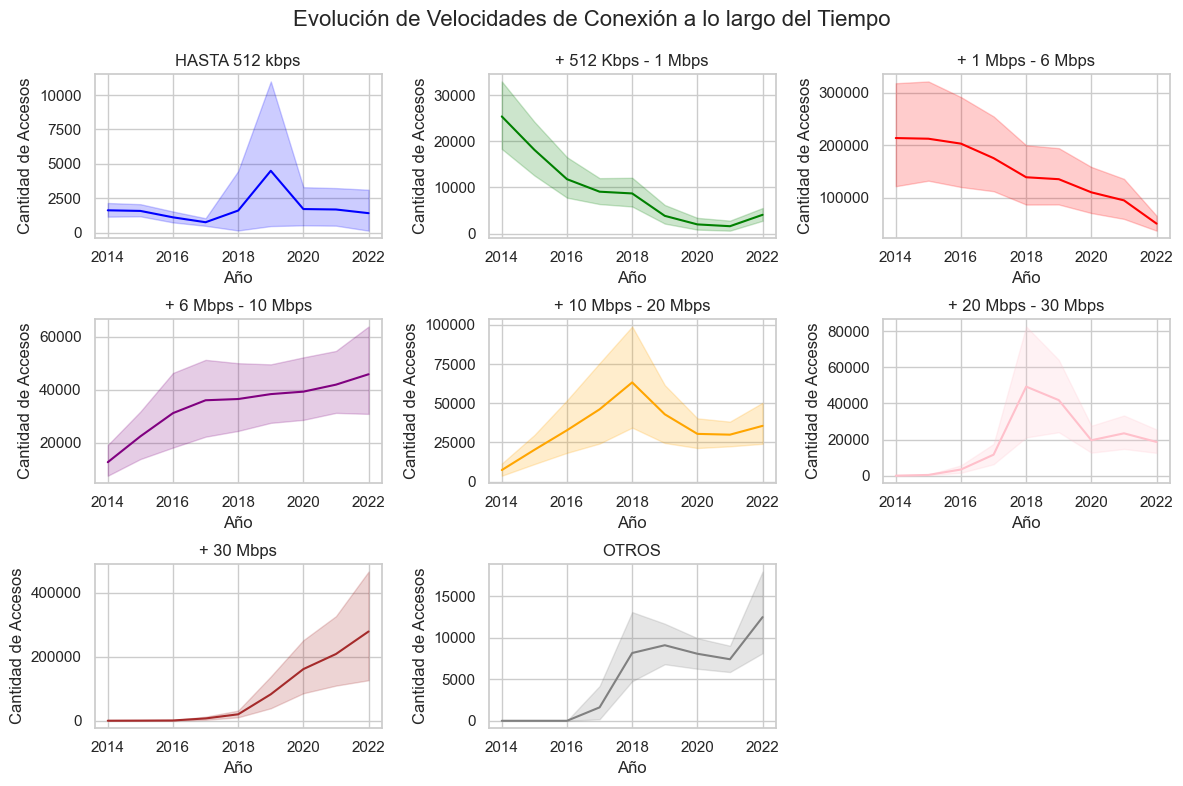

In [355]:
# Seleccionar las columnas relevantes para el gráfico de líneas temporales
columnas_temporales = ['Año', 'Trimestre', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Definir una paleta de colores
colores = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray']

# Crear un gráfico de líneas para cada categoría de velocidad
plt.figure(figsize=(12, 8))

for i, columna in enumerate(columnas_temporales[2:]):  # Comenzar desde la tercera columna
    plt.subplot(3, 3, i + 1)
    sns.lineplot(data=df_temporal, x='Año', y=columna, label=columna, color=colores[i])
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Accesos')
    plt.title(columna)
    plt.legend().remove()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Evolución de Velocidades de Conexión a lo largo del Tiempo', fontsize=16)
plt.show()

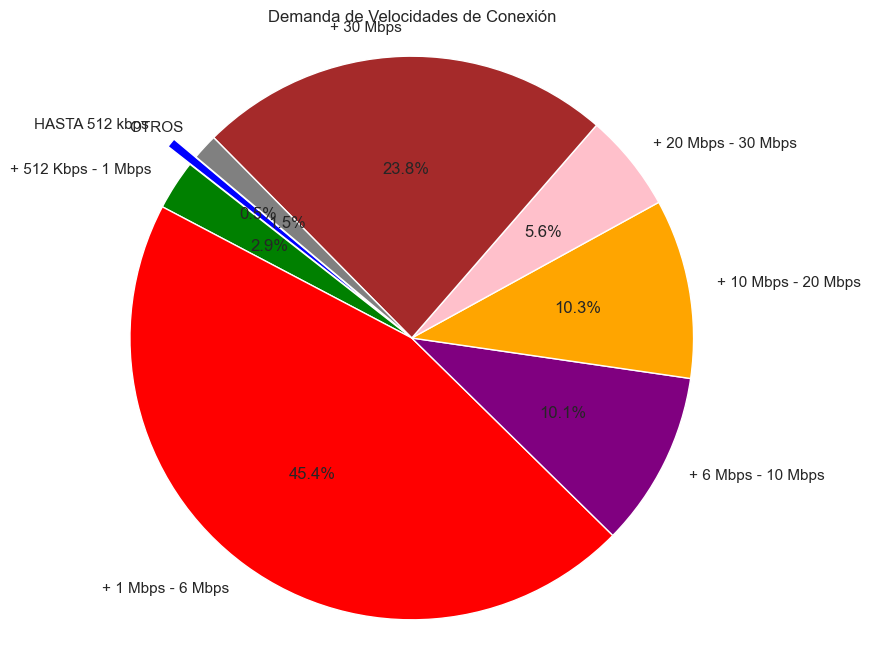

In [356]:
# Seleccionar las columnas relevantes para calcular la suma de accesos por categoría
columnas_velocidades = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Calcular la suma de accesos para cada categoría de velocidad
suma_accesos = df_velocidad[columnas_velocidades].sum()

# Etiquetas para las categorías de velocidad
etiquetas = suma_accesos.index

# Datos para crear el gráfico de torta
datos = suma_accesos.values

# Usar los mismos colores que en los gráficos de líneas temporales
colores = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray']

# Explode: resaltar la rebanada más grande (opcional)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)  # Resaltar la primera rebanada

# Crear el gráfico de torta con Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(datos, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Aspecto circular

# Título
plt.title('Demanda de Velocidades de Conexión')

# Mostrar el gráfico
plt.show()

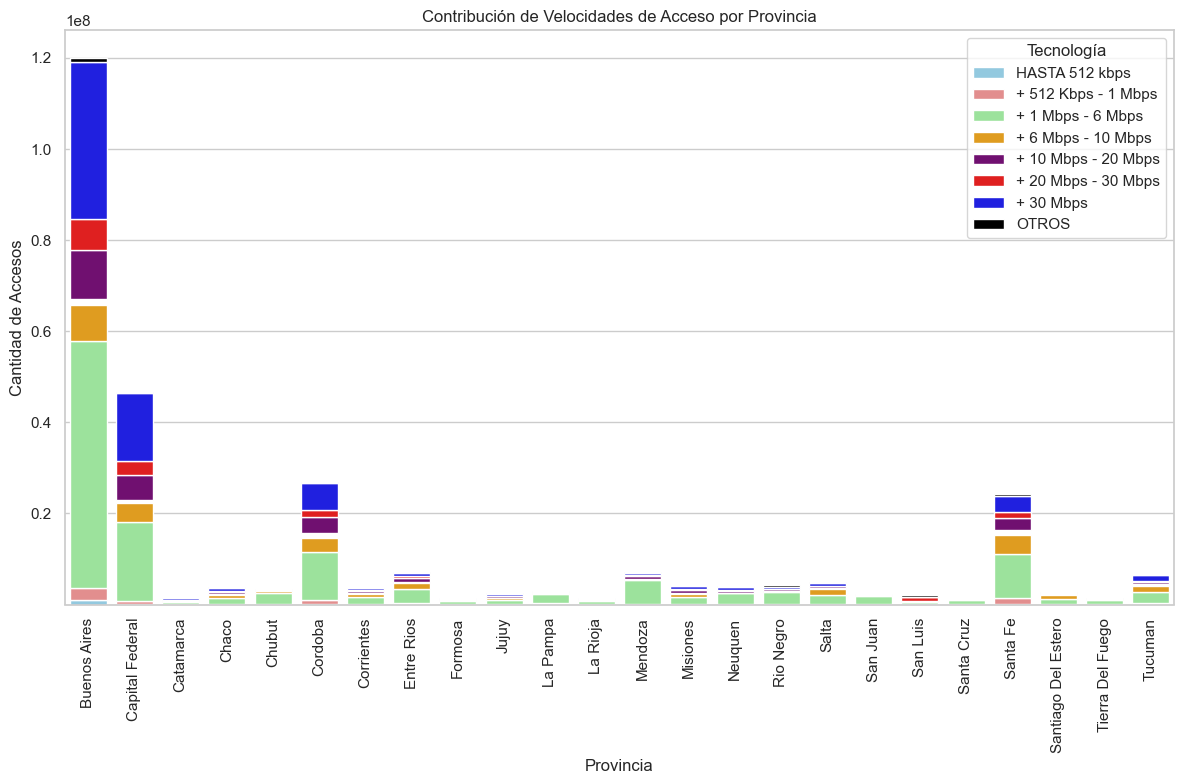

In [357]:
# Agrupar el DataFrame por provincia y sumar las cantidades de accesos para cada tecnología
df_grouped = df_velocidad.groupby('Provincia').sum().reset_index()

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped, x='Provincia', y='HASTA 512 kbps', label='HASTA 512 kbps', color='skyblue')
sns.barplot(data=df_grouped, x='Provincia', y='+ 512 Kbps - 1 Mbps', label='+ 512 Kbps - 1 Mbps', color='lightcoral', bottom=df_grouped['HASTA 512 kbps'])
sns.barplot(data=df_grouped, x='Provincia', y='+ 1 Mbps - 6 Mbps', label='+ 1 Mbps - 6 Mbps', color='lightgreen', bottom=df_grouped['HASTA 512 kbps'] + df_grouped['+ 512 Kbps - 1 Mbps'])
sns.barplot(data=df_grouped, x='Provincia', y='+ 6 Mbps - 10 Mbps', label='+ 6 Mbps - 10 Mbps', color='orange', bottom=df_grouped['HASTA 512 kbps'] + df_grouped['+ 512 Kbps - 1 Mbps'] + df_grouped['+ 1 Mbps - 6 Mbps'])
sns.barplot(data=df_grouped, x='Provincia', y='+ 10 Mbps - 20 Mbps', label='+ 10 Mbps - 20 Mbps', color='purple', bottom=df_grouped['+ 512 Kbps - 1 Mbps'] + df_grouped['+ 512 Kbps - 1 Mbps'] + df_grouped['+ 1 Mbps - 6 Mbps'] + df_grouped['+ 6 Mbps - 10 Mbps'])
sns.barplot(data=df_grouped, x='Provincia', y='+ 20 Mbps - 30 Mbps', label='+ 20 Mbps - 30 Mbps', color='red', bottom=df_grouped['+ 512 Kbps - 1 Mbps'] + df_grouped['+ 512 Kbps - 1 Mbps'] + df_grouped['+ 1 Mbps - 6 Mbps'] + df_grouped['+ 6 Mbps - 10 Mbps'] + df_grouped['+ 10 Mbps - 20 Mbps'])
sns.barplot(data=df_grouped, x='Provincia', y='+ 30 Mbps', label='+ 30 Mbps', color='blue', bottom=df_grouped['+ 512 Kbps - 1 Mbps'] + df_grouped['+ 512 Kbps - 1 Mbps'] + df_grouped['+ 1 Mbps - 6 Mbps'] + df_grouped['+ 6 Mbps - 10 Mbps'] + df_grouped['+ 10 Mbps - 20 Mbps'] + df_grouped['+ 20 Mbps - 30 Mbps'])
sns.barplot(data=df_grouped, x='Provincia', y='OTROS', label='OTROS', color='black', bottom=df_grouped['+ 512 Kbps - 1 Mbps'] + df_grouped['+ 512 Kbps - 1 Mbps'] + df_grouped['+ 1 Mbps - 6 Mbps'] + df_grouped['+ 6 Mbps - 10 Mbps'] + df_grouped['+ 10 Mbps - 20 Mbps'] + df_grouped['+ 20 Mbps - 30 Mbps'] + df_grouped['+ 30 Mbps'])
# Configurar etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Accesos')
plt.title('Contribución de Velocidades de Acceso por Provincia')
plt.xticks(rotation=90)
plt.legend(title='Tecnología')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Los gráficos muestran que la demanda de velocidades de Internet superior a 30 Mbps es relativamente baja y no representa ni una cuarta parte del total de velocidades demandadas en el país. En nueve provincias, esta velocidad es prácticamente inexistente, y en las provincias más globalizadas, no alcanza ni la mitad de la demanda total.

Por otro lado, la velocidad de 1 a 6 Mbps sigue siendo predominante, aunque se observa un marcado descenso en su demanda.

Podriamos recomendar:

Ampliar la Infraestructura de Alta Velocidad: Dado que la demanda de velocidades superiores a 30 Mbps es baja, podría ser beneficioso continuar expandiendo la infraestructura de alta velocidad para garantizar que esté disponible para aquellos que la necesitan. Esto podría mejorar la conectividad en áreas urbanas y rurales.

Optimización de Redes en Velocidades Medianas: Dado que las velocidades de 1 a 6 Mbps siguen siendo predominantes, es importante asegurarse de que estas velocidades sean estables y eficientes. Las empresas de telecomunicaciones podrían trabajar en la optimización de estas redes para brindar un servicio de calidad.

In [358]:
df_mbps = pd.read_csv("C:/Users/pablo/OneDrive/Escritorio/Henry/Labs Data Analyst/csv_normalizados/historico_velocidad_internet.csv")

In [359]:
df_mbps

Año  Trimestre            Provincia  Mbps (Media de bajada) Year_Trim
0    2022          3         Buenos Aires                      70    2022-3
1    2022          3      Capital Federal                     101    2022-3
2    2022          3            Catamarca                      61    2022-3
3    2022          3                Chaco                      53    2022-3
4    2022          3               Chubut                      16    2022-3
..    ...        ...                  ...                     ...       ...
835  2014          1           Santa Cruz                       3    2014-1
836  2014          1             Santa Fe                       3    2014-1
837  2014          1  Santiago Del Estero                       3    2014-1
838  2014          1     Tierra Del Fuego                       3    2014-1
839  2014          1              Tucuman                       3    2014-1

[840 rows x 5 columns]

In [360]:
df_mbps.describe()

Año  Trimestre  Mbps (Media de bajada)
count  840.00     840.00                  840.00
mean  2017.89       2.46                   13.84
std      2.53       1.11                   14.67
min   2014.00       1.00                    3.00
25%   2016.00       1.00                    4.00
50%   2018.00       2.00                    7.00
75%   2020.00       3.00                   18.00
max   2022.00       4.00                  101.00

Velocidad Media de Bajada (Mbps): Esta columna representa la velocidad media de bajada de Internet en Megabits por segundo (Mbps). Aquí, podemos observar lo siguiente:

Conteo (count): Hay 840 observaciones válidas para la velocidad de bajada.

Media (mean): La velocidad media de bajada en todas las provincias y trimestres es de aproximadamente 13.84 Mbps.

Desviación Estándar (std): La dispersión de los datos es relativamente alta, con una desviación estándar de aproximadamente 14.67 Mbps. Esto indica que las velocidades varían considerablemente de una provincia y trimestre a otro.

Valor Mínimo (min): La velocidad mínima registrada es de 3 Mbps.

Percentiles (25%, 50%, 75%): El 25% de las observaciones tienen velocidades inferiores a 4 Mbps, el 50% tiene velocidades inferiores a 7 Mbps y el 75% tiene velocidades inferiores a 18 Mbps.

Valor Máximo (max): La velocidad máxima registrada es de 101 Mbps.

En resumen, estos datos proporcionan información sobre la velocidad media de bajada de Internet en diversas provincias durante varios años y trimestres. La mayoría de las velocidades se encuentran en el rango de 3 a 101 Mbps, con una variabilidad significativa en las velocidades observadas en diferentes momentos y lugares.







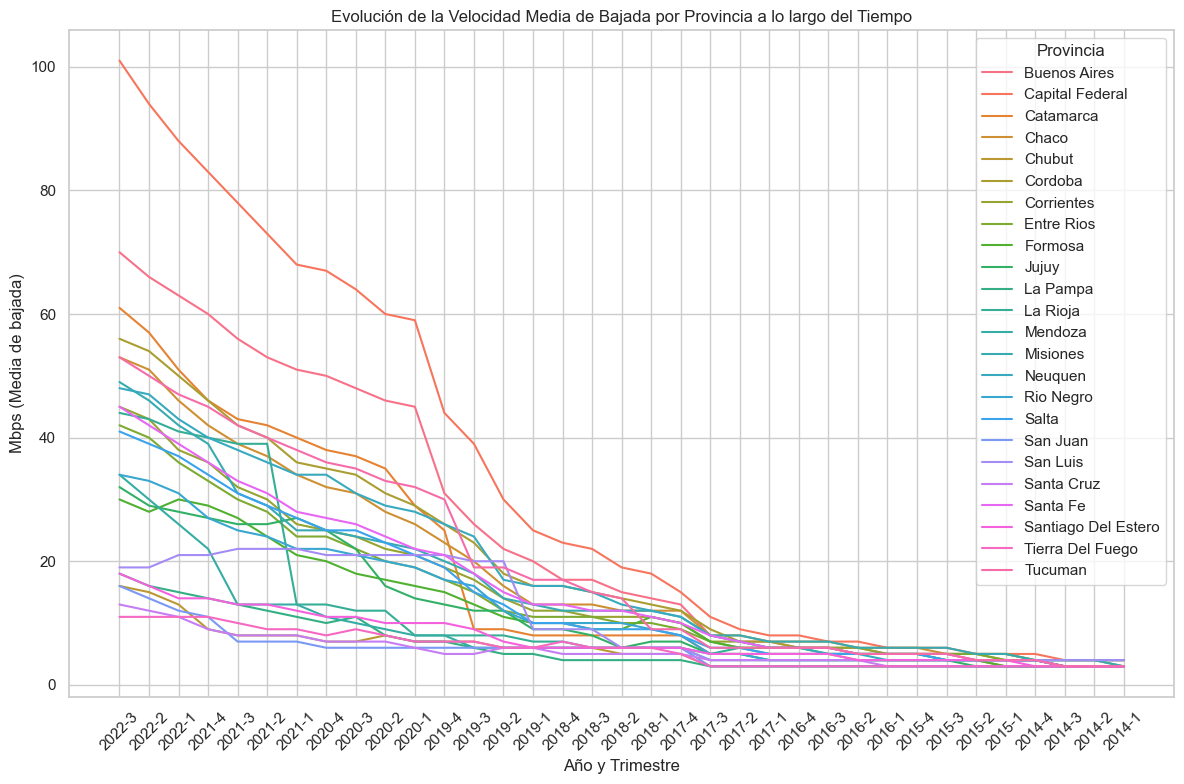

In [361]:
# Crear un gráfico de líneas temporales
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_mbps, x='Year_Trim', y='Mbps (Media de bajada)', hue='Provincia')

# Configurar etiquetas y título
plt.xlabel('Año y Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Evolución de la Velocidad Media de Bajada por Provincia a lo largo del Tiempo')
plt.xticks(rotation=45)
plt.legend(title='Provincia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Evaluamos la evolucion de la velocidad de bajada media de todas las provincias para analizar la diferencia en la evolucion entre ellas

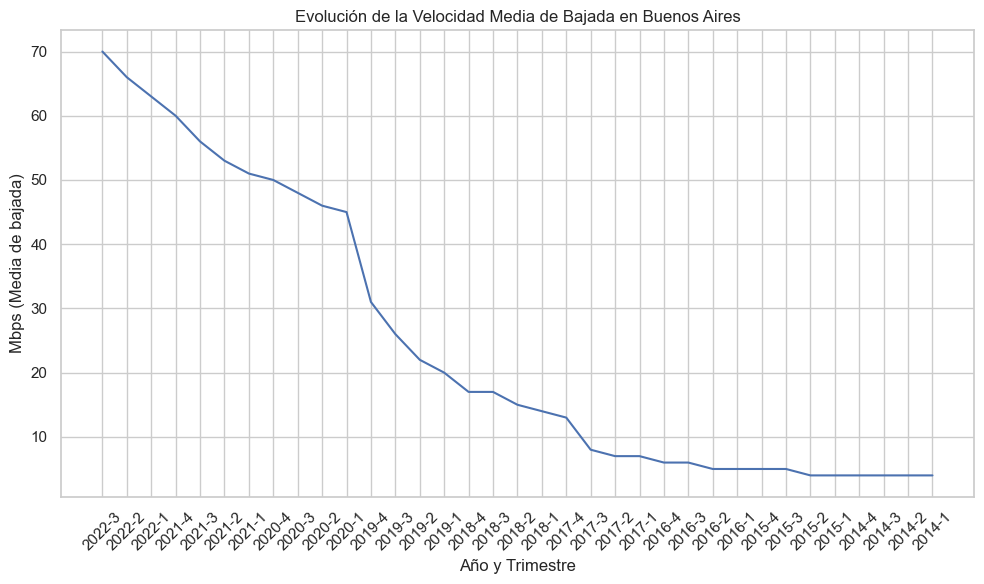

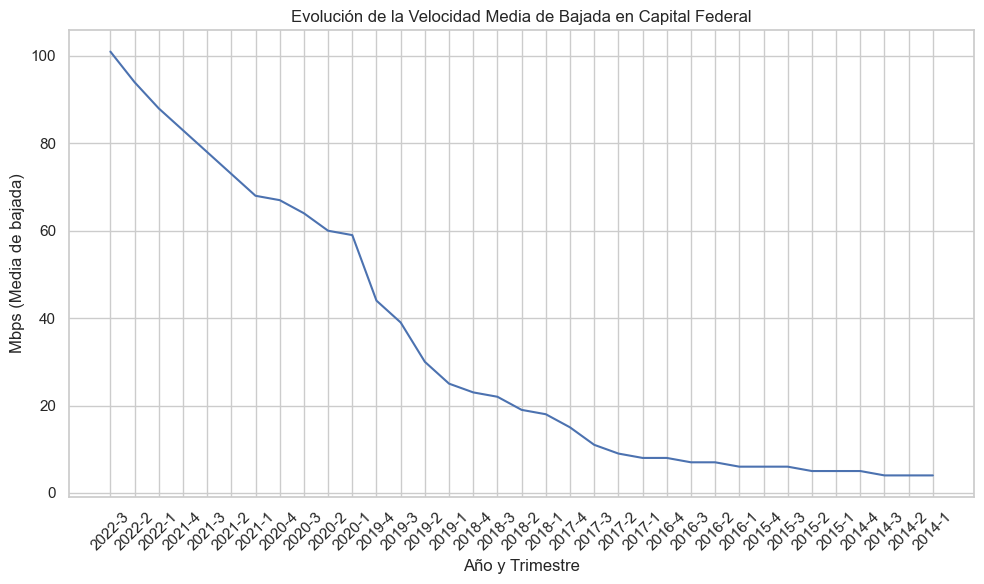

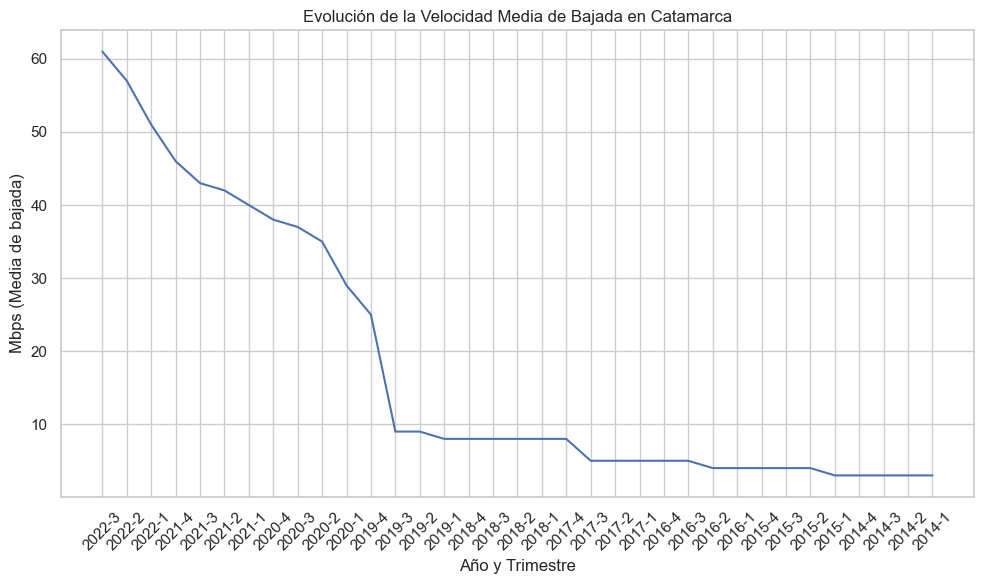

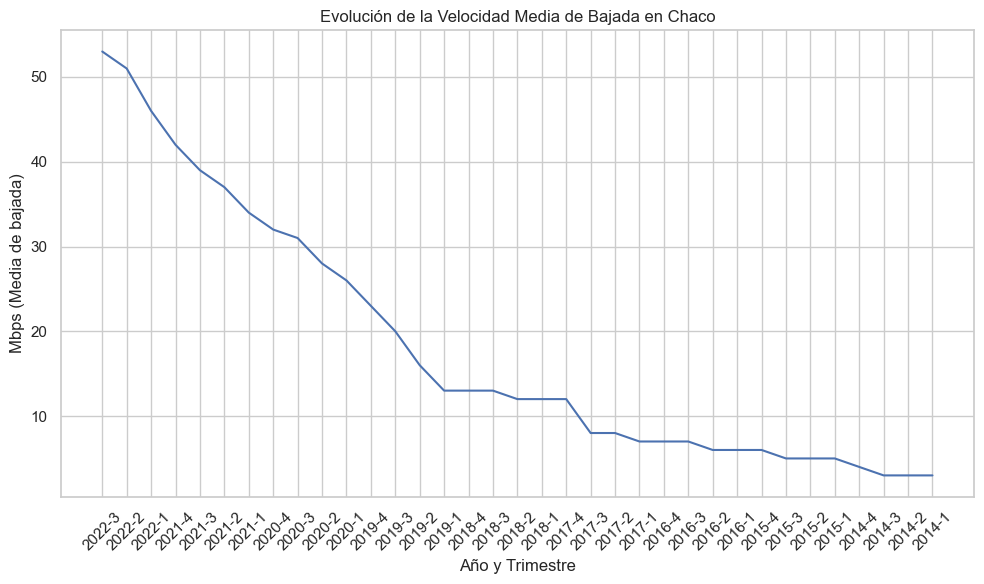

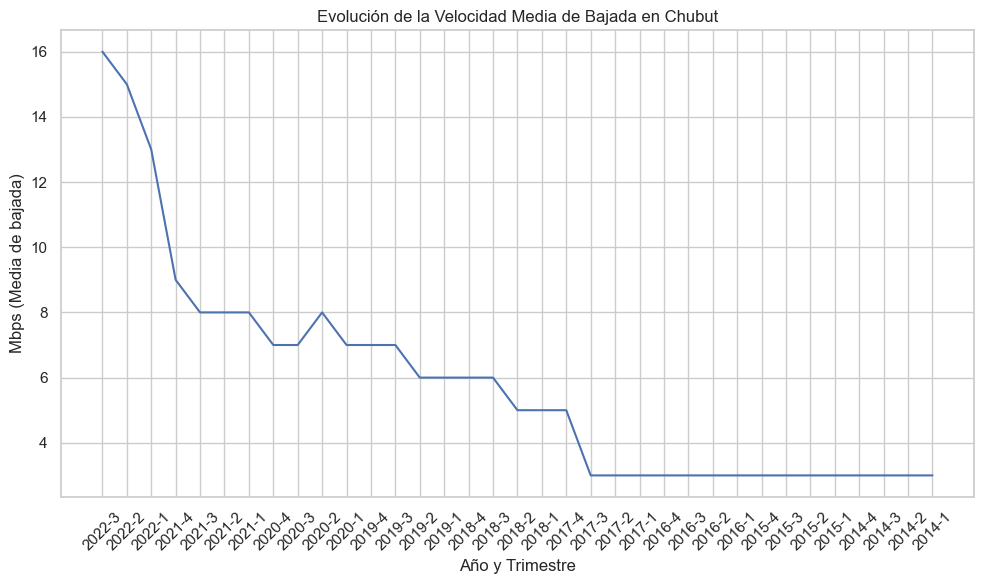

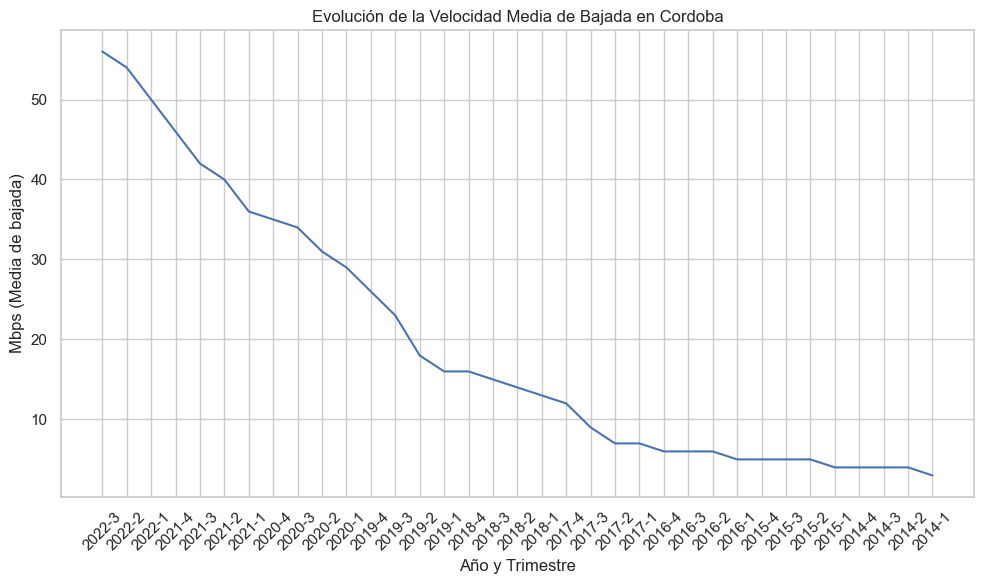

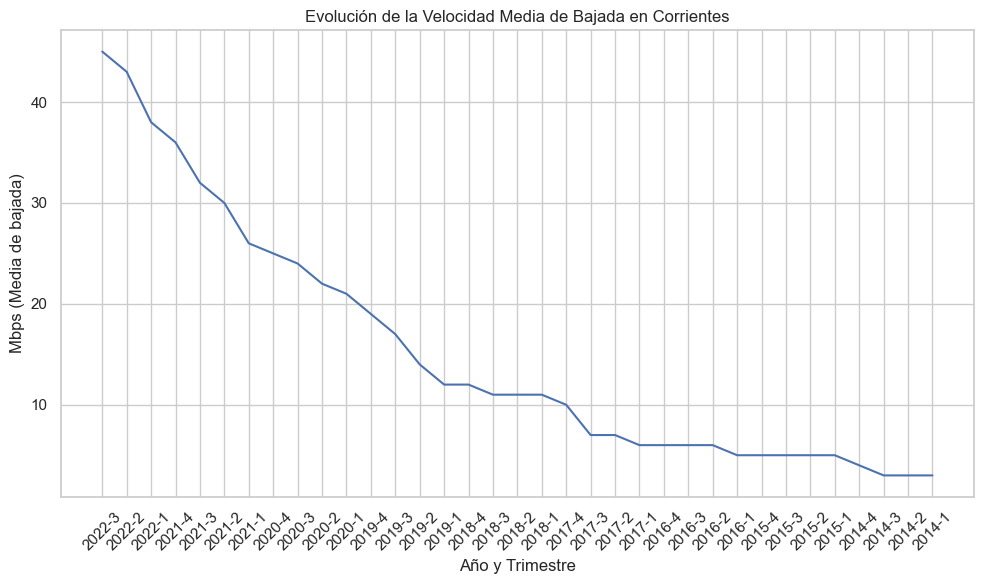

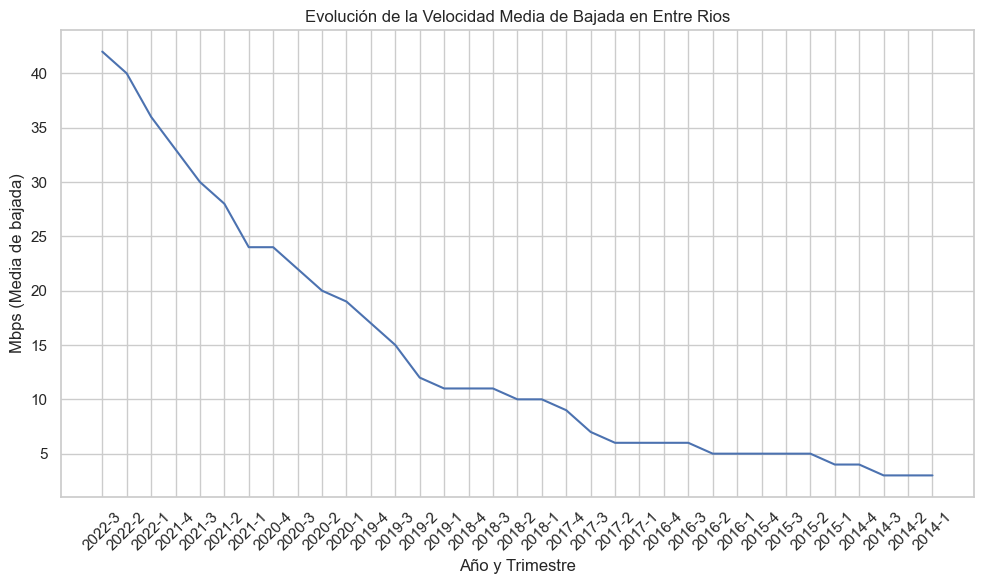

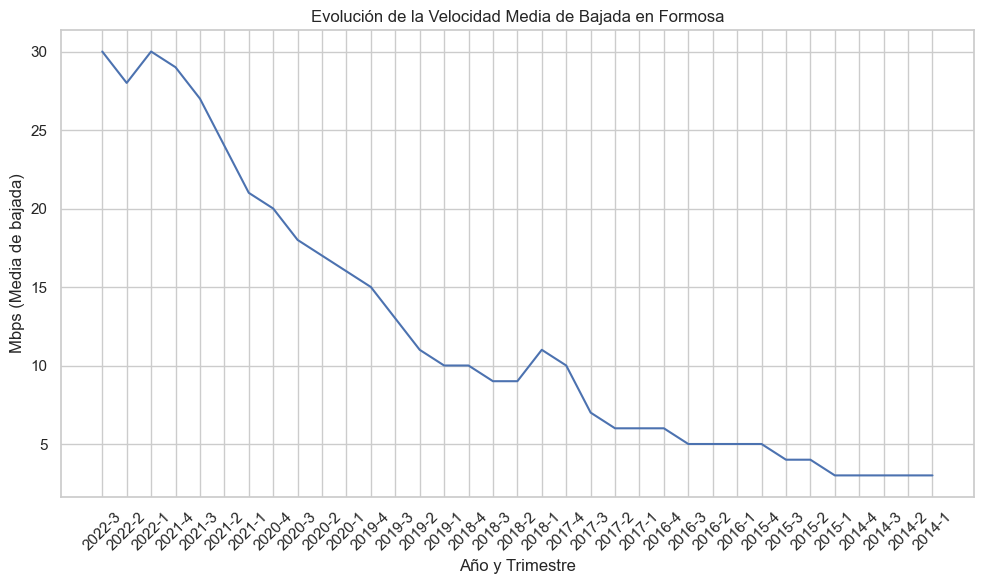

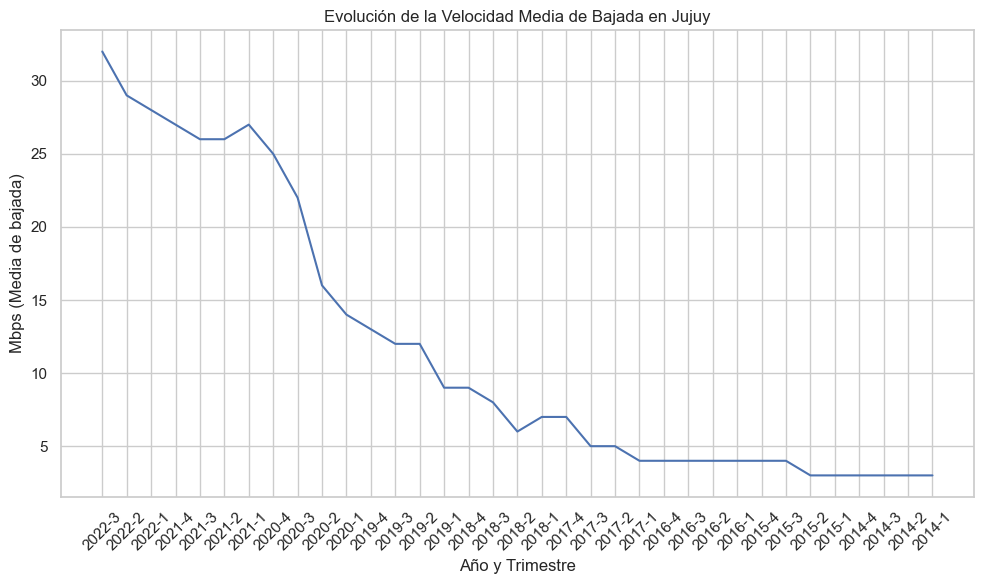

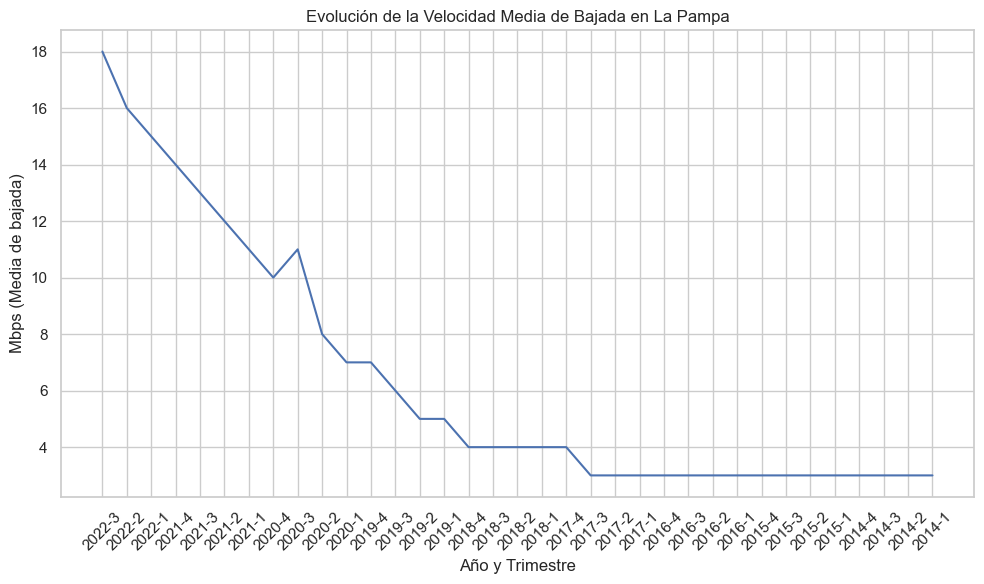

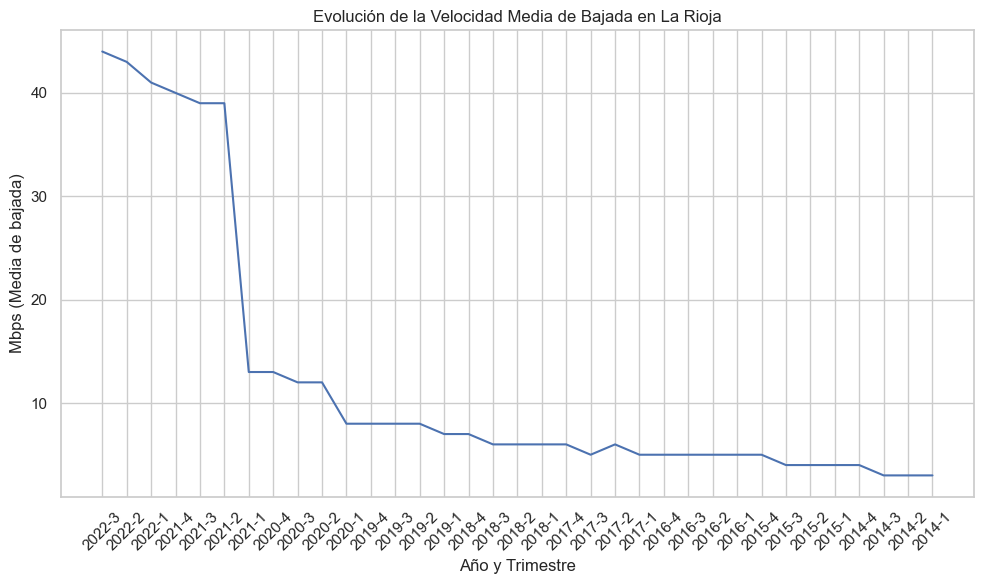

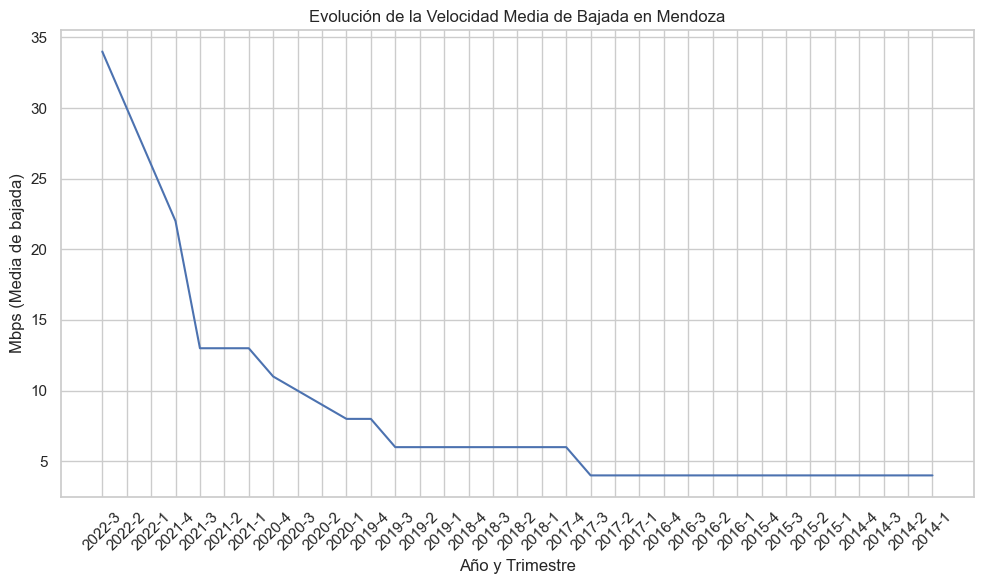

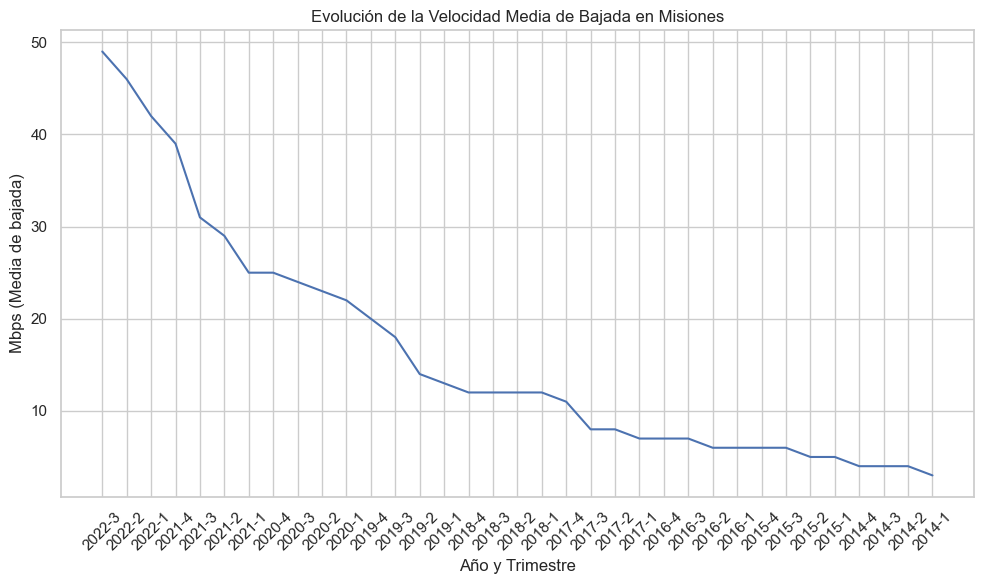

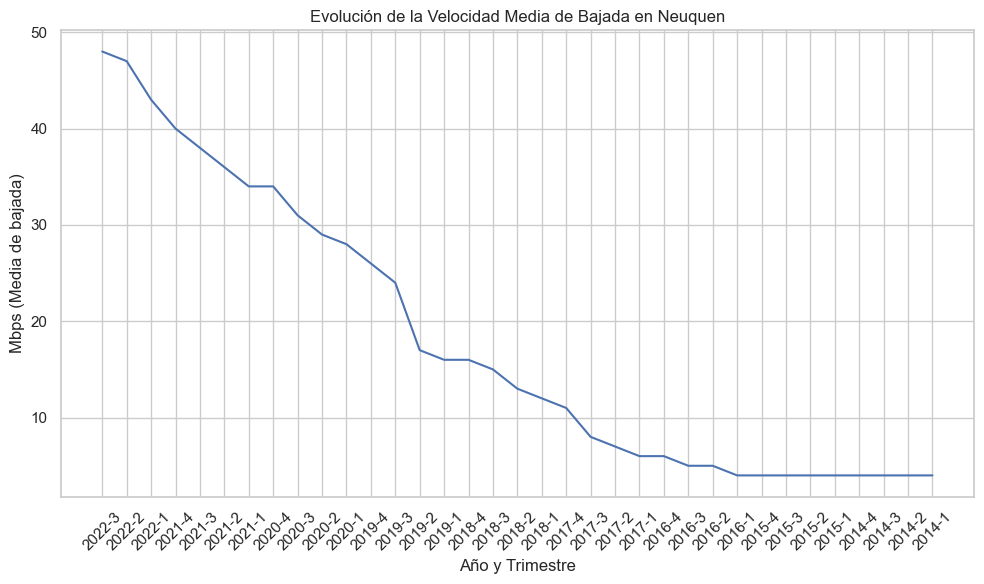

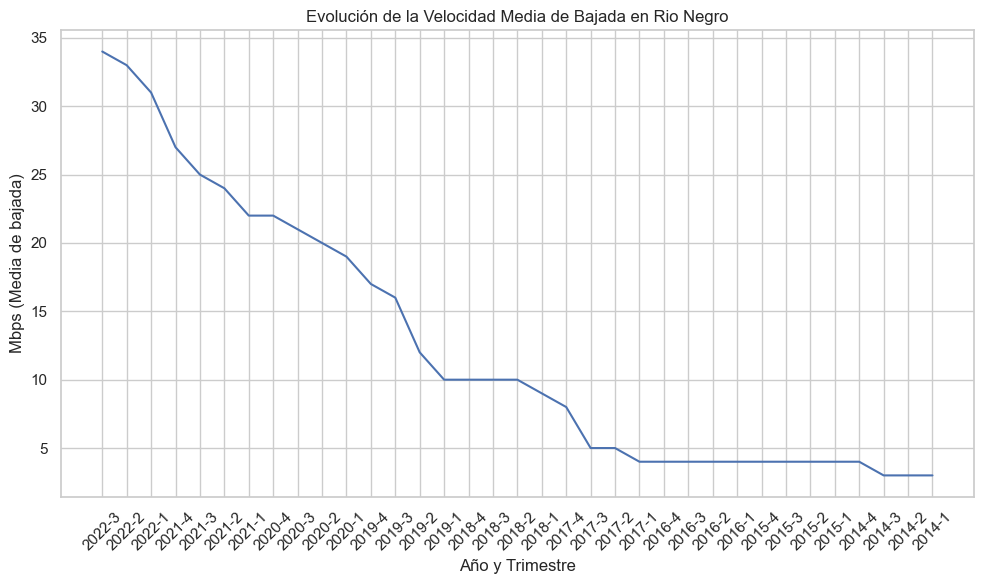

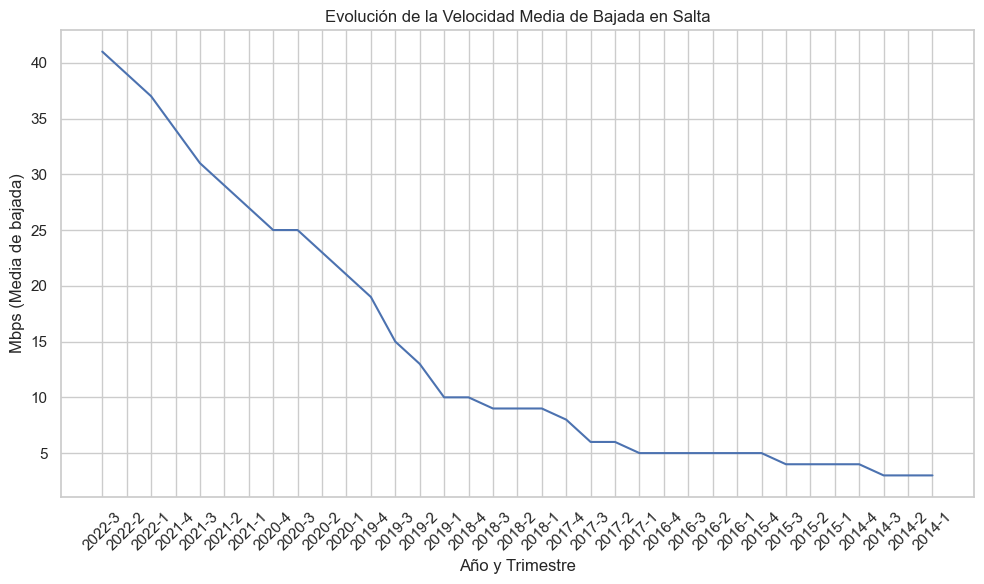

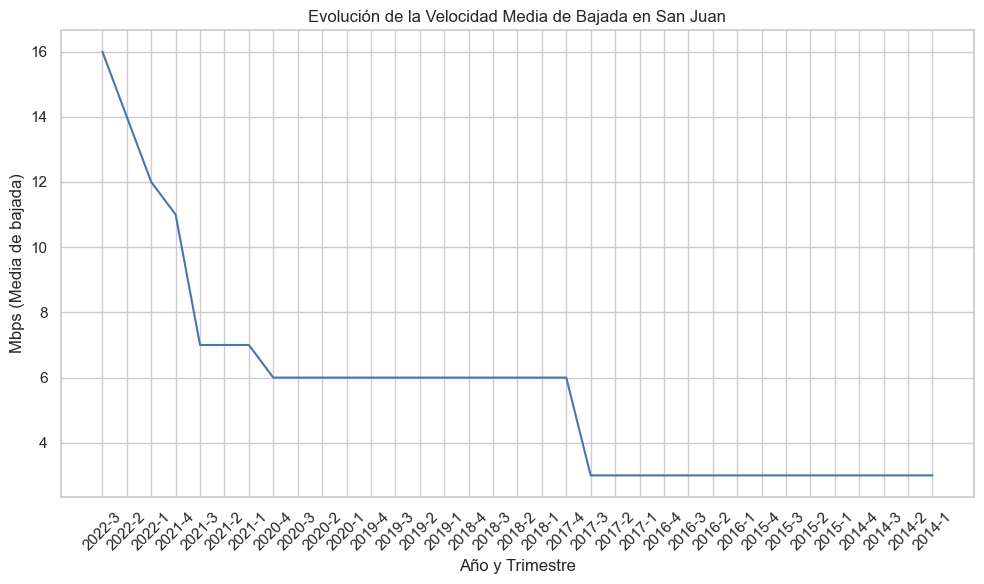

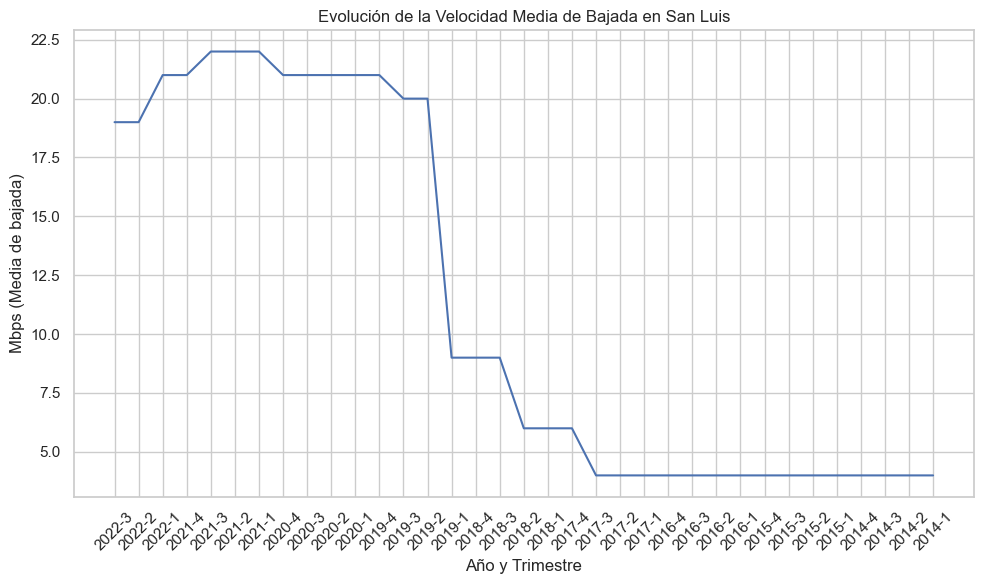

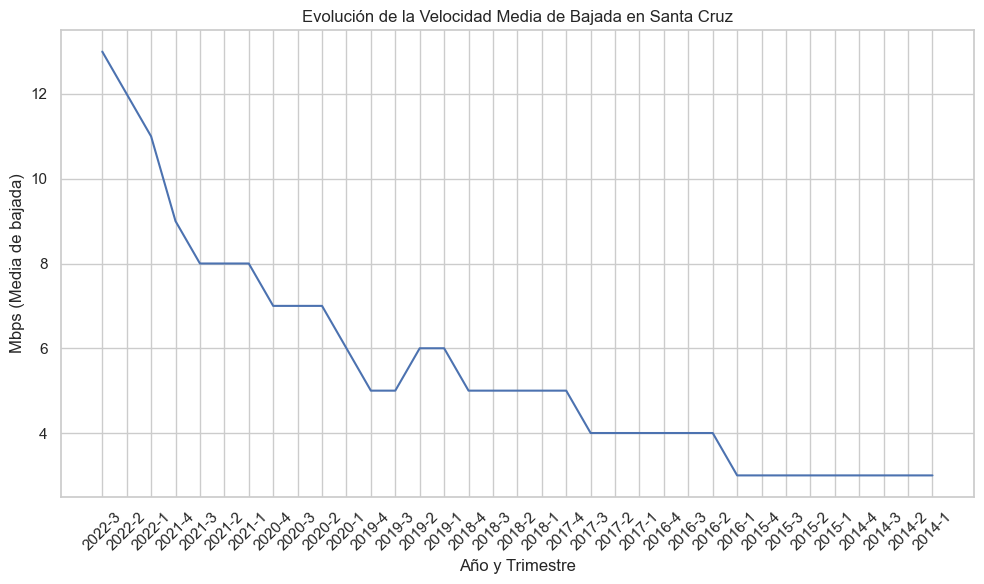

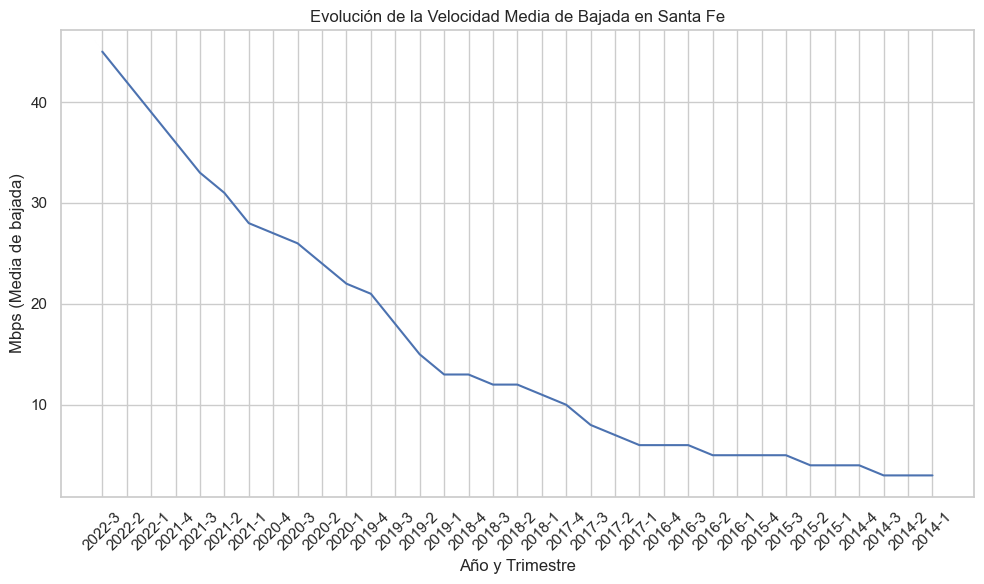

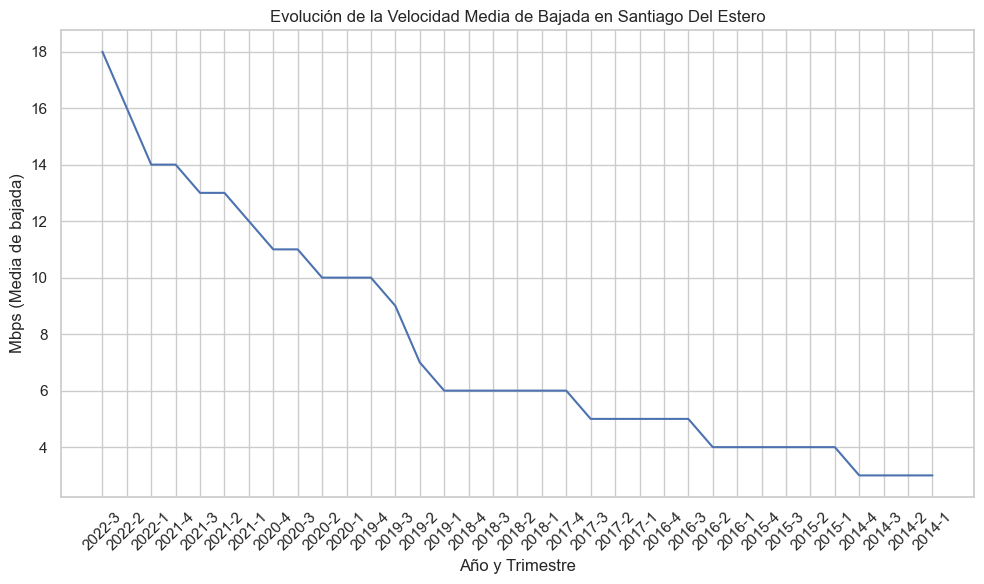

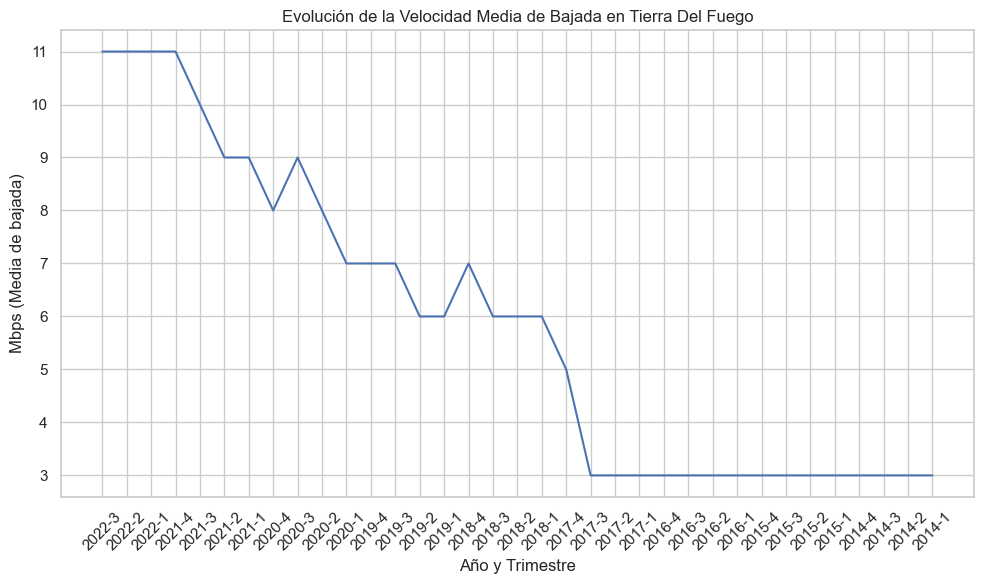

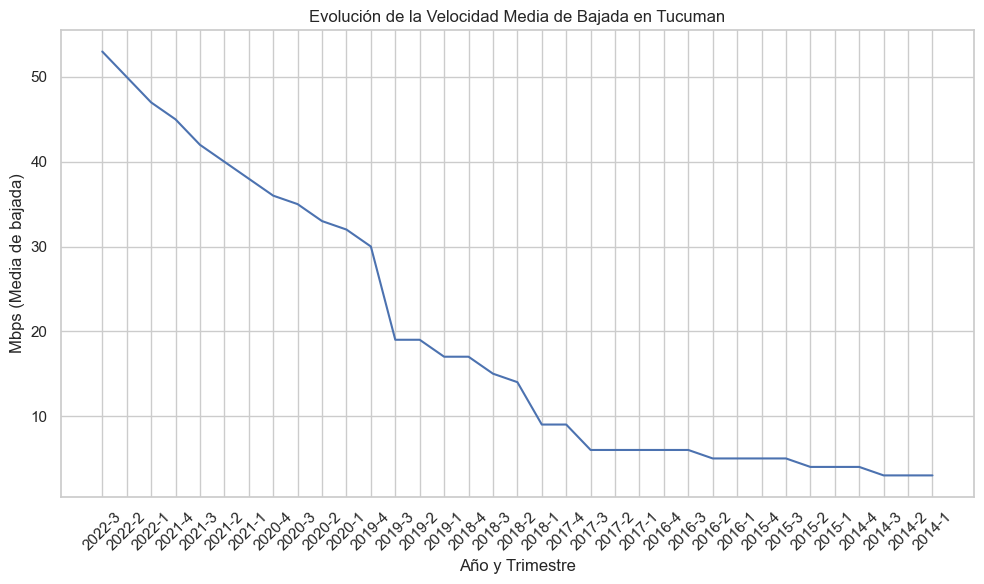

In [362]:
# Obtener la lista de provincias únicas en el DataFrame
provincias_unicas = df_mbps['Provincia'].unique()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de líneas para cada provincia
for provincia in provincias_unicas:
    plt.figure(figsize=(10, 6))
    df_provincia = df_mbps[df_mbps['Provincia'] == provincia]
    sns.lineplot(data=df_provincia, x='Year_Trim', y='Mbps (Media de bajada)')
    
    # Configurar etiquetas y título
    plt.xlabel('Año y Trimestre')
    plt.ylabel('Mbps (Media de bajada)')
    plt.title(f'Evolución de la Velocidad Media de Bajada en {provincia}')
    plt.xticks(rotation=45)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()








Con en analisis particular de la evolucion de la velocidad media de bajada por cada provincia podemos observar que en la mayoria de ellas estan en crecimiento, algunas con mas, y otras con menos, y muy pocas con retroceso. Podemos evaluar el caso de las que crecieron muy poco y retrocedieron para mejorar y equiparar con el resto de las provincias. Tambien cruzar los datos con la demanda y las teconologias para ver si vale la pena invertir en infraestructura

C:\Users\pablo\AppData\Local\Temp\ipykernel_12532\792588829.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_filtered, x='Provincia', y='Mbps (Media de bajada)', hue='Año', ci=None)


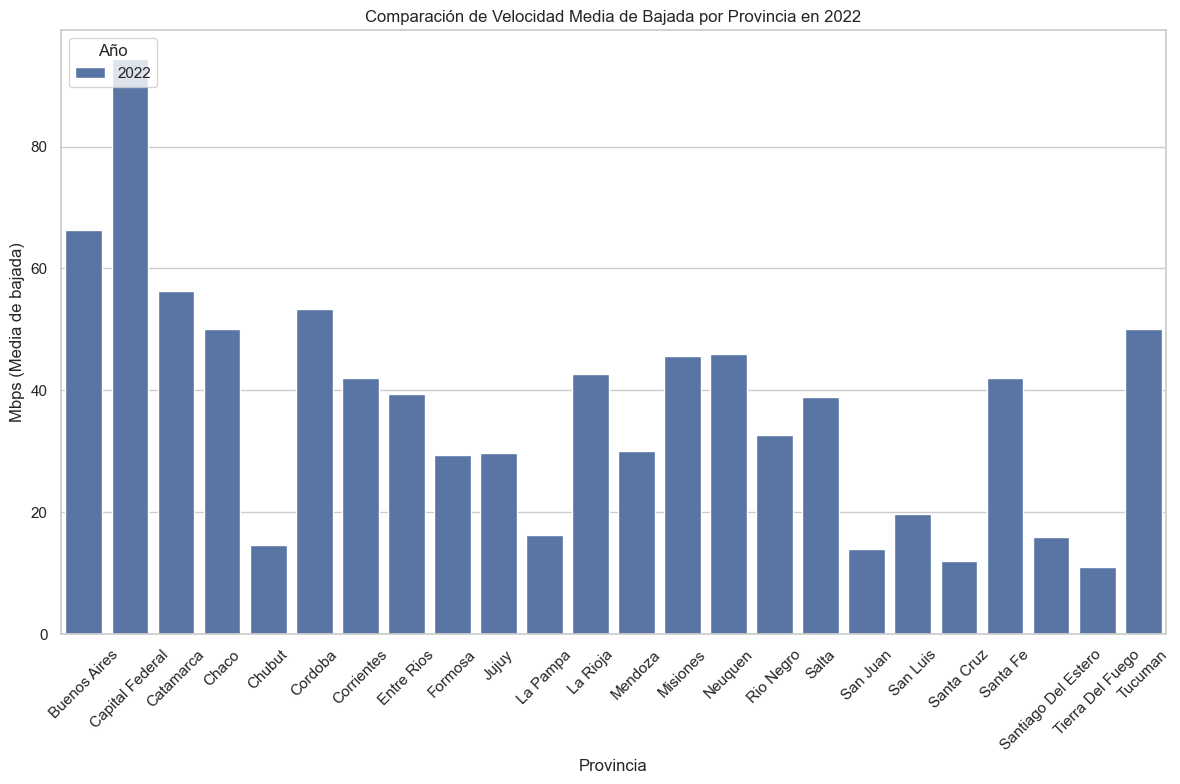

In [363]:

# Filtrar el DataFrame para el año deseado (por ejemplo, 2022)
year_to_plot = 2022
df_filtered = df_mbps[df_mbps['Año'] == year_to_plot]

# Crear un gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(data=df_filtered, x='Provincia', y='Mbps (Media de bajada)', hue='Año', ci=None)

# Configurar etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.title(f'Comparación de Velocidad Media de Bajada por Provincia en {year_to_plot}')
plt.xticks(rotation=45)
plt.legend(title='Año', loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Con este grafico de barras podemos analizar el estado mas actualizado de las velocidades medias de bajada de cada provincia. Chubut, La Pampa, San Juan, San Luis, Santiago Del Estero y Tierra Del Fuego no superan los 20 mbps de velocidad media de bajada. Entre Rios, Jujuy, Mendoza, Rio Negro y Salta no superan los 40 mbps. 

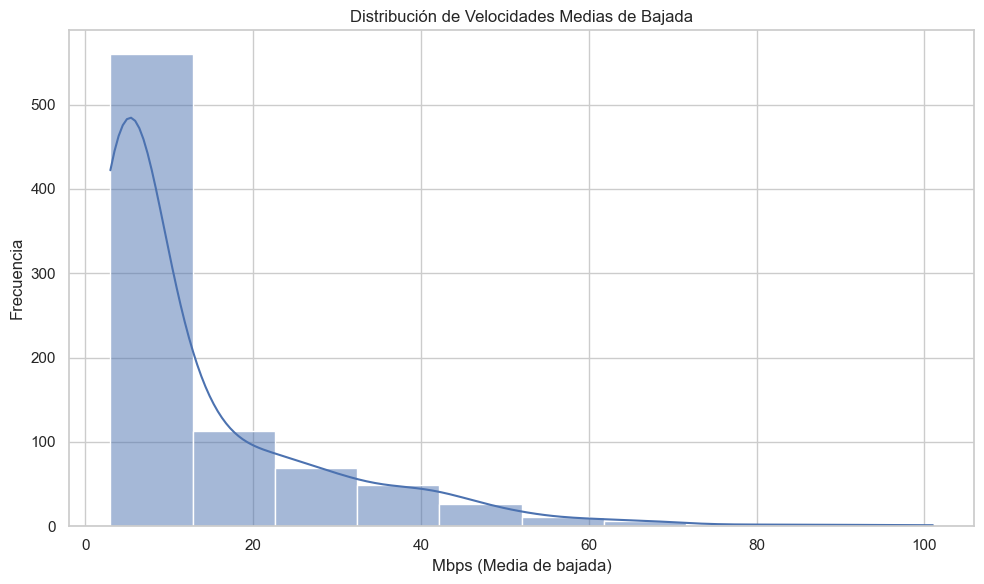

In [364]:
# Crear un histograma de las velocidades medias de bajada
plt.figure(figsize=(10, 6))
sns.histplot(data=df_mbps, x='Mbps (Media de bajada)', bins=10, kde=True)

# Configurar etiquetas y título
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Velocidades Medias de Bajada')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

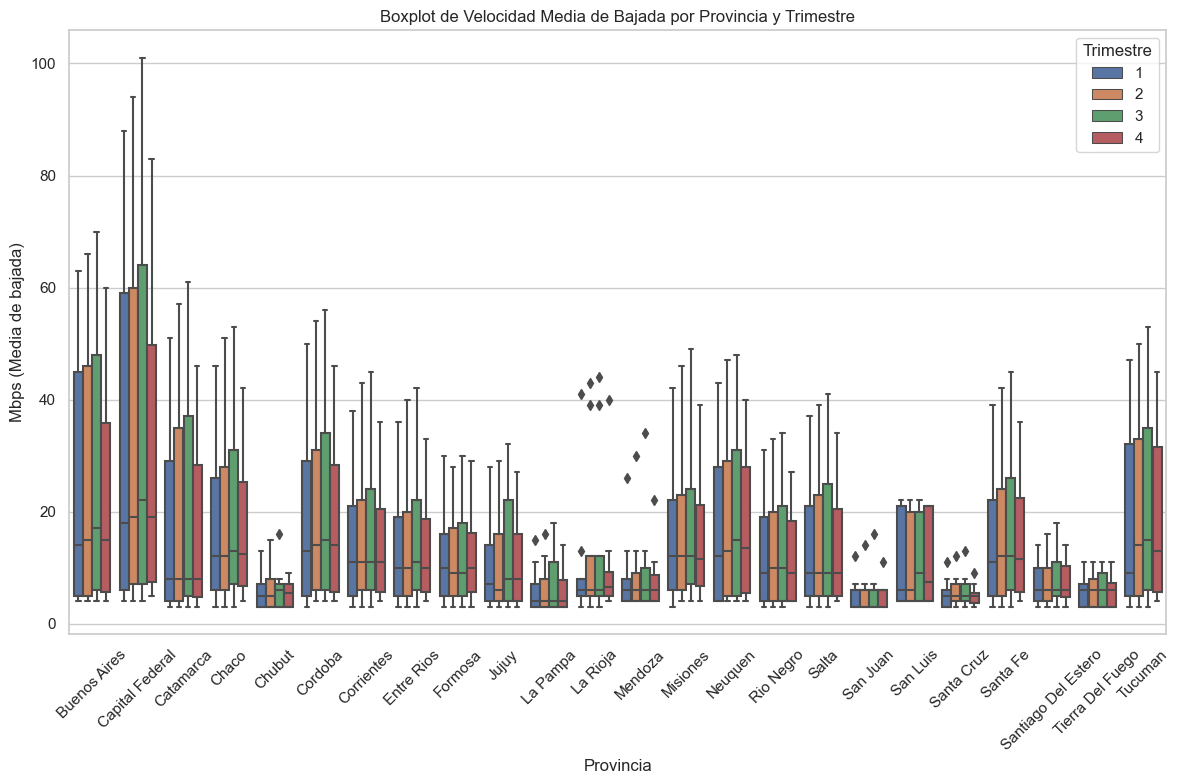

In [365]:
# Crear un boxplot para la velocidad de bajada
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_mbps, x='Provincia', y='Mbps (Media de bajada)', hue='Trimestre')

# Configurar etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Boxplot de Velocidad Media de Bajada por Provincia y Trimestre')
plt.xticks(rotation=45)
plt.legend(title='Trimestre', loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Los outliers de este grafico responden a una mejora abrupta en la velocidad media de bajada de estas provincias. 

In [366]:
df_ingreso = pd.read_csv('C:/Users/pablo/OneDrive/Escritorio/Henry/Labs Data Analyst/dataset pirncipales/Ingresos.csv')

In [367]:
df_ingreso.head(10)

Año  Trimestre Ingresos (miles de pesos)        Periodo
0  2022          3                67.055.930  Jul-Sept 2022
1  2022          2                60.335.724   Abr-Jun 2022
2  2022          1                55.589.997   Ene-Mar 2022
3  2021          4                45.467.887   Oct-Dic 2021
4  2021          3                42.999.944  Jul-Sept 2021
5  2021          2                38.239.667   Abr-Jun 2021
6  2021          1                36.676.371   Ene-Mar 2021
7  2020          4                33.539.703   Oct-Dic 2020
8  2020          3                31.997.445  Jul-Sept 2020
9  2020          2                32.102.476   Abr-Jun 2020

In [368]:
df_ingreso['Ingresos (miles de pesos)'] = df_ingreso['Ingresos (miles de pesos)'].apply(lambda x: int(x.replace(".","")))

In [369]:
df_ingreso['Year_Trim'] = df_ingreso['Año'].astype(str) + '-' + df_ingreso['Trimestre'].astype(str)

In [370]:
df_ingreso.describe()

Año  Trimestre  Ingresos (miles de pesos)
count   35.00      35.00                      35.00
mean  2017.89       2.46                20588449.40
std      2.56       1.12                17742137.56
min   2014.00       1.00                 2984054.00
25%   2016.00       1.50                 6235543.00
50%   2018.00       2.00                14319467.00
75%   2020.00       3.00                32049960.50
max   2022.00       4.00                67055930.00

Media (mean): La media de los ingresos en miles de pesos es aproximadamente 20,588,449.40. Esto indica que, en promedio, se generaron alrededor de 20.6 millones de pesos por trimestre durante el período analizado.

Desviación Estándar (std): La desviación estándar de los ingresos es aproximadamente 17,742,137.56. Esto muestra la dispersión de los datos y sugiere que los ingresos pueden variar considerablemente de un trimestre a otro.

Valor Mínimo (min): El valor mínimo de ingresos en un trimestre es de 2,984,054.00. Este fue el trimestre con los ingresos más bajos en el período.

Percentil 25 (25%): El 25% de los trimestres tienen ingresos menores o iguales a 6,235,543.00. Esto indica que el 25% más bajo de los trimestres tuvo ingresos relativamente bajos.

Mediana (50%): La mediana de los ingresos es de aproximadamente 14,319,467.00. Esto significa que la mitad de los trimestres tuvo ingresos por debajo de este valor y la otra mitad por encima.

Percentil 75 (75%): El 75% de los trimestres tienen ingresos menores o iguales a 32,049,960.50. Esto muestra que el 75% de los trimestres tuvo ingresos relativamente altos.

Valor Máximo (max): El valor máximo de ingresos en un trimestre es de 67,055,930.00. Este fue el trimestre con los ingresos más altos en el período.

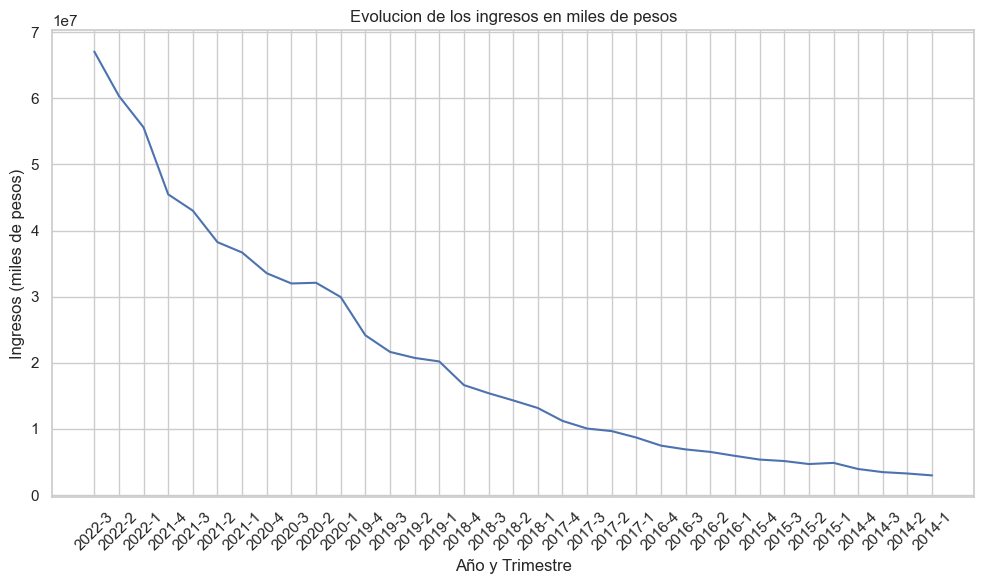

In [371]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ingreso, x='Year_Trim', y='Ingresos (miles de pesos)')

# Configurar etiquetas y título
plt.xlabel('Año y Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Evolucion de los ingresos en miles de pesos')
plt.xticks(rotation=45)
    
# Mostrar el gráfico
plt.tight_layout()
plt.show()

Claramente podemos observar que la evolucion de los ingresos sobre el tiempo a crecido significativamente, por lo que sugiere una inversion muy segura y redituable el negocio de las telecomunicaciones

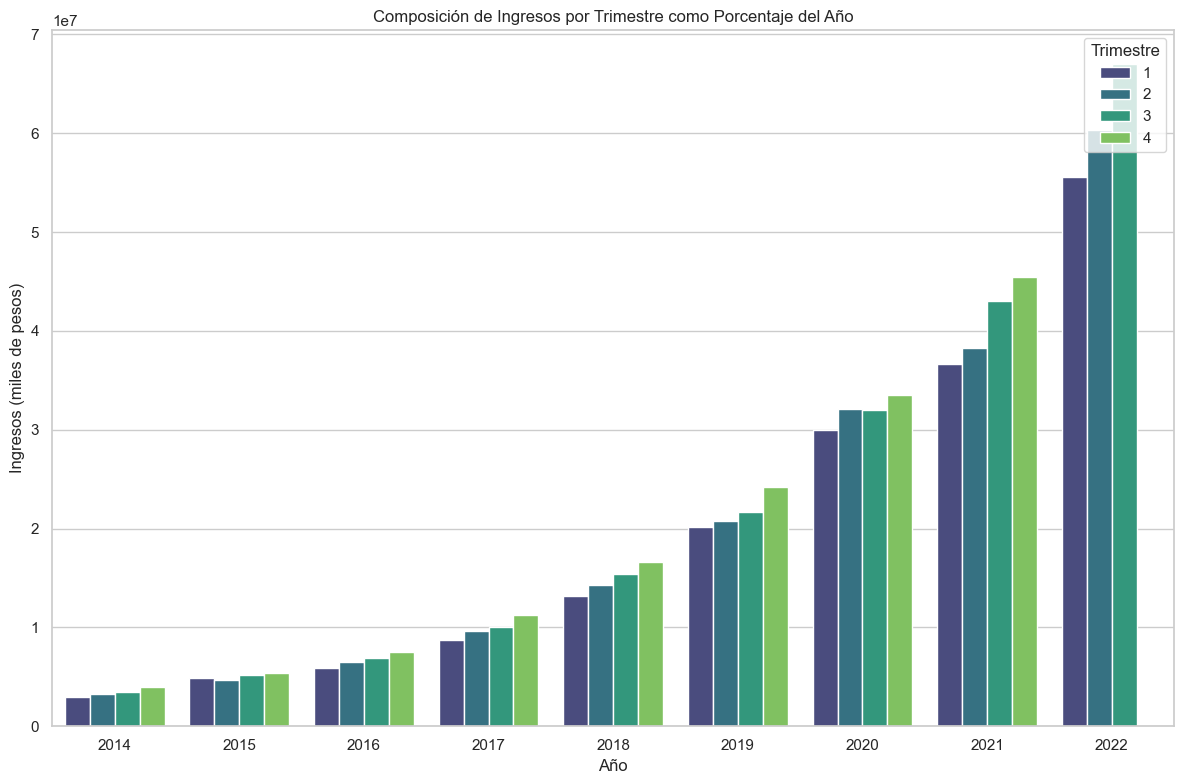

In [372]:
# Calcular los ingresos totales por año
total_por_ano = df_ingreso.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

# Calcular los porcentajes de ingresos por trimestre dentro de cada año
df_grouped_year = df_ingreso.merge(total_por_ano, on='Año', suffixes=('', '_total'))
df_grouped_year['Porcentaje'] = (df_grouped_year['Ingresos (miles de pesos)'] / df_grouped_year['Ingresos (miles de pesos)_total']) * 100

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped_year, x='Año', y='Ingresos (miles de pesos)', hue='Trimestre', palette='viridis')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Composición de Ingresos por Trimestre como Porcentaje del Año')

# Mostrar el gráfico
plt.tight_layout()
plt.legend(title='Trimestre', loc='upper right')
plt.show()

Hay una clara tendencia de que los ingresos en el ultimo trimestre del año son mayores a los demas, se debe a una estrategia de marketing para ofrecer promociones a un menor costo por el hecho de ser primavera-verano en Argentina. Lo cual la gente normalmente prefiere cambiar de compañia, o contratar nuevamente el servicio. Hay que tener en cuenta tambien la inflacion que tiene el pais, a principios del 2014 un dolar equivalia a 6,40 pesos argentinos, y a fines del 2022 el mismo equivalia a 276 pesos argentinos

In [373]:
df_penetracion_agrupado = df_penetracion.groupby('Year_Trim')['Accesos por cada 100 hogares'].mean().reset_index()


In [374]:
trim = {'3 *':'3',
        '2 *':'2',
        '1 *':'1'}


In [375]:
df_tecnologia['Año'].replace('2019 *', '2019', inplace=True)

In [376]:
df_tecnologia['Trimestre'].replace(trim, inplace=True)


In [377]:
df_tecnologia['Año'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

In [378]:
df_tecnologia_agrupado = df_tecnologia.groupby('Year_Trim')[['ADSL', 'Cablemodem', 'Fibra óptica',	'Wireless',	'Otros',	'Total']].mean().reset_index()

In [379]:
df_tecnologia_agrupado.replace({'2019 *-1 *':'2019-1',
                     '2019 *-2 *': '2019-2',
                     '2019 *-3 *': '2019-3'}, inplace=True)

In [380]:
columnas_promedio = ['HASTA 512 kbps',	'+ 512 Kbps - 1 Mbps',	'+ 1 Mbps - 6 Mbps',	'+ 6 Mbps - 10 Mbps',	'+ 10 Mbps - 20 Mbps',	'+ 20 Mbps - 30 Mbps',	'+ 30 Mbps'	,'OTROS'	,'Total']
df_velocidad['Year_Trim'] = df_velocidad['Año'].astype(str) + '-' + df_velocidad['Trimestre'].astype(str)
df_velocidad_agrupado = df_velocidad.groupby('Year_Trim')[columnas_promedio].mean().reset_index()

In [381]:
df_mbps_agrupado = df_mbps.groupby('Year_Trim')['Mbps (Media de bajada)'].mean().reset_index()

In [382]:
df_ingreso_tecnologia = pd.merge(df_ingreso, df_tecnologia_agrupado, on='Year_Trim')

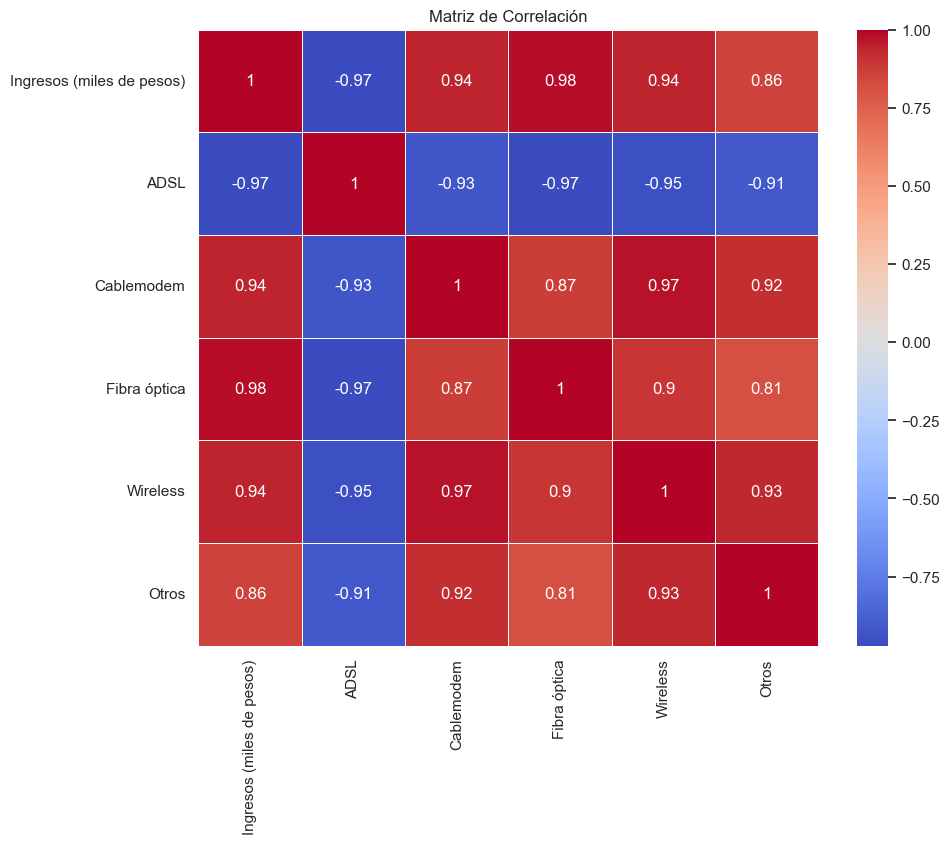

In [383]:
# Calcula la matriz de correlación
correlation_matrix = df_ingreso_tecnologia.drop(columns=['Periodo', 'Year_Trim', 'Año', 'Trimestre', 'Total']).corr()

# Crea un mapa de calor para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

Podemos observar una fuerte correlacion entre los ingresos y todas las tecnologias, salvando ADSL que es negativamente muy correlativa, y destacando Fibra Optica que es positivamente mas correlativa que las demas

In [384]:
df_ingreso_velocidad = pd.merge(df_ingreso, df_velocidad_agrupado, on='Year_Trim')

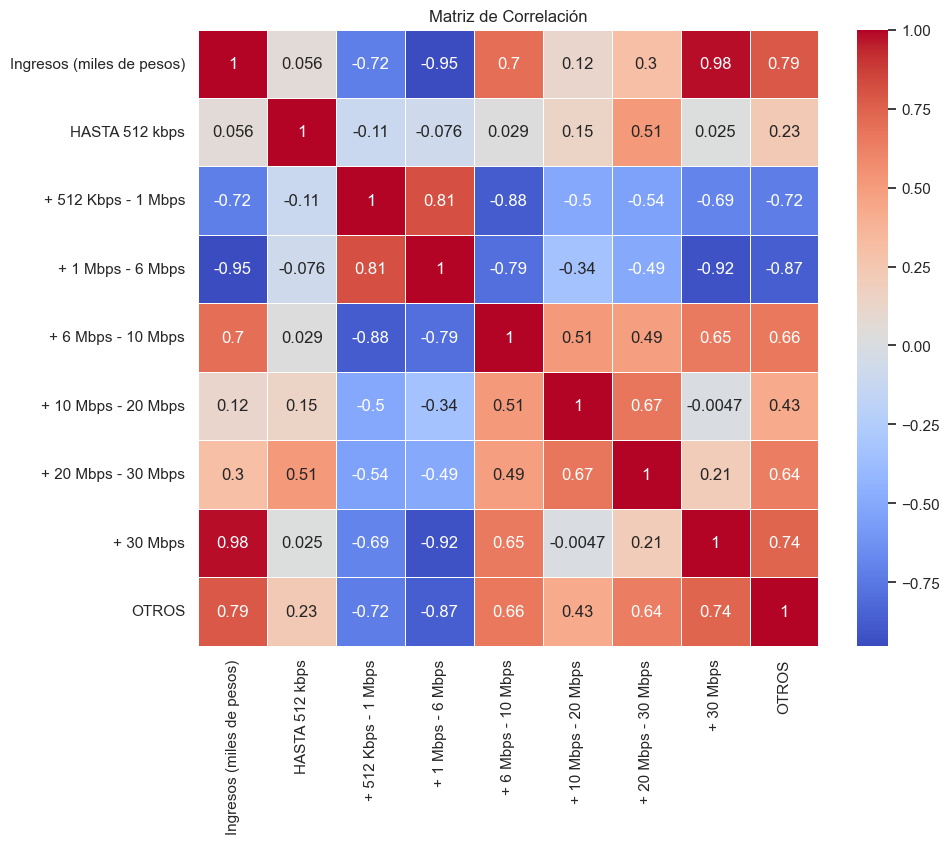

In [385]:
# Calcula la matriz de correlación
correlation_matrix = df_ingreso_velocidad.drop(columns=['Periodo', 'Year_Trim', 'Año', 'Trimestre', 'Total']).corr()

# Crea un mapa de calor para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

A diferencia de las tecnologias, las velocidades no son todas correlativas, sino que la mayoria son neutras en base a los ingresos. Las mas destacables son la de +30 Mbps que es positivamente muy correlativa, y la de + 1 Mbps - 6 Mbps que es negativamente muy correlativa

In [386]:
df_ingreso_penetracion = pd.merge(df_ingreso, df_penetracion_agrupado, on='Year_Trim')

In [387]:
df_ingreso_penetracion_mbps = pd.merge(df_ingreso_penetracion, df_mbps_agrupado, on='Year_Trim')

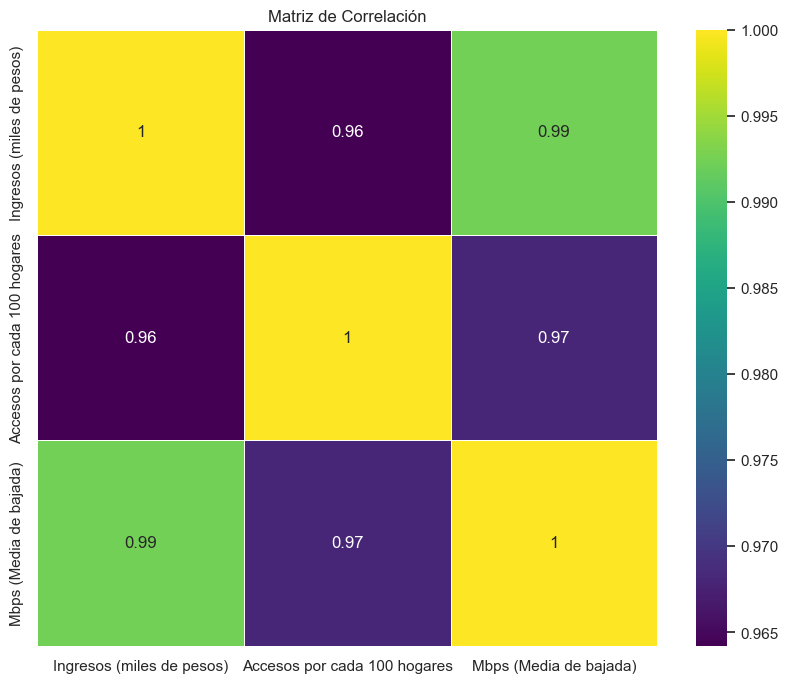

In [388]:
# Calcula la matriz de correlación
correlation_matrix = df_ingreso_penetracion_mbps.drop(columns=['Periodo', 'Year_Trim', 'Año', 'Trimestre']).corr()

# Crea un mapa de calor para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

Aca podemos observar que las 3 variables a analizar son positivamente muy correlativas entre si